In [1]:
import pandas as pd
import os
import numpy as np
import ipywidgets as ipw
#import bqplot as bq
import ipyvolume as ipv
import matplotlib.pyplot as plt
import sklearn.preprocessing
from random import randint
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import ipyvolume as ipv
from sklearn.decomposition import NMF
import seaborn as sns
import re
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz 
import matplotlib
from sklearn.decomposition import NMF
from sklearn.cross_decomposition import PLSRegression
import statsmodels.formula.api as sm
from statsmodels.api import add_constant
from scipy.stats import ttest_ind
import matplotlib.ticker as ticker
import sys
from multiprocessing import Pool
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import roc_auc_score
import scipy
from collections import defaultdict
from scipy.spatial import distance
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', None)
%matplotlib inline

plt.rcParams['figure.figsize'] = (40.0, 40.0)


# Reusable Functions

In [2]:
def create_plots(par_stat):

        ############################################################################
        ## First filter
        x_col_1 = 'mu'
        y_col_1 = 'mz/nodes'
        opt_col_1 = 'max_nodes_mz'
        
        selected = par_stat[[x_col_1, y_col_1]].groupby('mu').max()
        selected[opt_col_1] = True
        par_stat = pd.merge(par_stat, selected, how = 'left', on = [x_col_1, y_col_1])
        par_stat[opt_col_1] = par_stat[opt_col_1].fillna(0)
                
        fig, axes = plt.subplots(4,2)
    
        x1 = par_stat[x_col_1].values
        y1 = par_stat[y_col_1].values
        
        #max_mz = [1 for m in par_stat['mu'].unique() ]
        color_1 = par_stat[opt_col_1].values

        axes[0][0].scatter(x1, y1, c = color_1, cmap = 'viridis')
        axes[0][0].set_xlim(min(x1), max(x1))
        axes[0][0].set_ylim(min(y1), max(y1))
        axes[0][0].set_xlabel(x_col_1, fontsize=20)
        axes[0][0].set_ylabel(y_col_1, fontsize=20)
        
        ############################################################################
        ## Second filter
        x_col_2 = 'mu'
        y_col_2 = 'No_mz'
        opt_col_2 = 'max_mz_stability'
        
        selected = pd.DataFrame(par_stat[y_col_2].value_counts()).reset_index()
        selected.columns = [y_col_2, opt_col_2]
        selected[opt_col_2] = selected[opt_col_2] == max(selected[opt_col_2])
        par_stat = pd.merge(par_stat, selected, how = 'left', on = y_col_2)
        par_stat[opt_col_2] = par_stat[opt_col_2].fillna(0)
    
        x2 = par_stat[x_col_2].values
        y2 = par_stat[y_col_2].values
                
        #max_mz = [1 for m in par_stat['mu'].unique() ]
        color_2 = par_stat[opt_col_2].values

        axes[0][1].scatter(x2, y2, c = color_2, cmap = 'viridis')
        axes[0][1].set_xlim(min(x2), max(x2))
        axes[0][1].set_ylim(min(y2), max(y2))
        axes[0][1].set_xlabel(x_col_2, fontsize=20)
        axes[0][1].set_ylabel(y_col_2, fontsize=20)
        
        
        ############################################################################
        ## First Interaction
        
        axes[1][0].scatter(x1, y1, c = color_2, cmap = 'viridis')
        axes[1][0].set_xlim(min(x1), max(x1))
        axes[1][0].set_ylim(min(y1), max(y1))
        axes[1][0].set_xlabel(x_col_1, fontsize=20)
        axes[1][0].set_ylabel(y_col_1, fontsize=20)
        
        ############################################################################
        ## Second Interaction
        
        axes[1][1].scatter(x2, y2, c = color_1, cmap = 'viridis')
        axes[1][1].set_xlim(min(x2), max(x2))
        axes[1][1].set_ylim(min(y2), max(y2))
        axes[1][1].set_xlabel(x_col_2, fontsize=20)
        
        ############################################################################
        ## First Optimal
        opt_col_3 = 'opt_sum'
        par_stat[opt_col_3] = par_stat[opt_col_1] + par_stat[opt_col_2]
        color_3 = par_stat[opt_col_3].values
        
        axes[2][0].scatter(x1, y1, c = color_3, cmap = 'viridis')
        axes[2][0].set_xlim(min(x1), max(x1))
        axes[2][0].set_ylim(min(y1), max(y1))
        axes[2][0].set_xlabel(x_col_1, fontsize=20)
        axes[2][0].set_ylabel(y_col_1, fontsize=20)
        
        ############################################################################
        ## Second Optimal
        
        opt_col_3 = 'opt_sum'
        par_stat[opt_col_3] = par_stat[opt_col_1] + par_stat[opt_col_2]
        color_3 = par_stat[opt_col_3].values
                
        axes[2][1].scatter(x2, y2, c = color_3, cmap = 'viridis')
        axes[2][1].set_xlim(min(x2), max(x2))
        axes[2][1].set_ylim(min(y2), max(y2))
        axes[2][1].set_xlabel(x_col_2, fontsize=20)
        axes[2][1].set_ylabel(y_col_2, fontsize=20)


        
        ############################################################################
        ## LP
        
        opt_col_3 = 'Optimal'
        #par_stat[opt_col_3] = par_stat[opt_col_1] + par_stat[opt_col_2]
        color_4 = par_stat[opt_col_3].values
        
        axes[3][0].scatter(x1, y1, c = color_4, cmap = 'viridis', alpha = 0.1)
        axes[3][0].set_xlim(min(x1), max(x1) + 0.1 * max(x1))
        axes[3][0].set_ylim(min(y1), max(y1) + 0.1 * max(y1))
        axes[3][0].set_xlabel(x_col_1, fontsize=20)
        axes[3][0].set_ylabel(y_col_1, fontsize=20)


         ############################################################################
        ## LP
        
        opt_col_3 = 'Optimal'
        #par_stat[opt_col_3] = par_stat[opt_col_1] + par_stat[opt_col_2]
        color_4 = par_stat[opt_col_3].values
             
        axes[3][1].scatter(x2, y2, c = color_4, cmap = 'viridis')
        axes[3][1].set_xlim(min(x2), max(x2))
        axes[3][1].set_ylim(min(y2), max(y2))
        axes[3][1].set_xlabel(x_col_2, fontsize=20)
        axes[3][1].set_ylabel(y_col_2, fontsize=20)


        return par_stat

In [4]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels, rotation = 90, fontsize = 20)
    ax.set_xlim(0.25, len(labels) + 0.75)

    
def snsplots(plot_df, col_set, plot_type = 'violin'):
    
    plt.figure(figsize=(10,10))
    
    plot_df_opt = plot_df.loc[plot_df['Optimal'] == True]
    plot_df     = plot_df.loc[plot_df['Optimal'] == False]
    
    print(len(plot_df_opt))
    print(len(plot_df))
    
    plot_df     = plot_df.sample(n=400, random_state=1)
        
    long_plot_df      = pd.DataFrame(columns = ['feature', 'value', 'Optimal'])
    
    
    for col in col_set:
            
        temp_df            = pd.DataFrame()
        temp_df['value']   = plot_df[col].values
        temp_df['feature'] = col
        temp_df['Optimal'] = 'All'
                
        temp_df_opt            = pd.DataFrame()
        temp_df_opt['value']   = plot_df_opt[col].values
        temp_df_opt['feature'] = col
        temp_df_opt['Optimal'] = 'Optimal'
                
        long_plot_df   = long_plot_df.append(temp_df, ignore_index = True, sort = False)
        long_plot_df   = long_plot_df.append(temp_df_opt, ignore_index = True, sort = False)

    if plot_type == 'violin':
    
        
        f = sns.violinplot(x="feature", y="value", data=long_plot_df, hue = 'Optimal',
                           scale="width", orient = 'v', split = False, inner = 'quartile')

        #f.set_yticklabels(f.get_yticklabels(), rotation = 90, fontsize = 20)
        f.set_xticklabels(f.get_xticklabels(), rotation = 90, fontsize = 20)
    
    elif plot_type == 'box':
        
        f = sns.boxplot(x="feature", y="value", data=long_plot_df, hue = 'Optimal',
                            orient = 'v')
        
        #f.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        #f.yaxis.set_major_formatter(ticker.ScalarFormatter())
        
        #f.set_yticklabels(f.get_yticklabels(), rotation = 0, fontsize = 20)
        f.set_xticklabels(f.get_xticklabels(), rotation = 90, fontsize = 20)
        

    else:
        print('Operation not correctly specified')
        return
    
    #print (long_plot_df[long_plot_df == 'mz_frequency'])
    
    #plt.yticks(rotation=90) 
    
    return




def preprocess(par_stat, optimal_parameters, col_set, mode = 'sheets', scaling = 'MinMax', scaling_group = 'all'):
    
    par_stat['Optimal'] = False
    
    par_stat['pos_ctrl_molecules'] = par_stat['pos_ctrl_molecules'].fillna(0)
    
    par_stat['log_mu'] = np.log(par_stat['mu'])
    
    par_stat['No_mz'] = par_stat['No_mz'].fillna(0)
    
    par_stat['countof_connected_component'] = par_stat['countof_connected_component'].fillna(0)
    par_stat['largest_connected_component'] = par_stat['largest_connected_component'].fillna(0)
    par_stat['normalized_largest_connected_component'] = par_stat['largest_connected_component'] / par_stat['No_Nodes']
    
    par_stat['normalized_largest_connected_component'] = par_stat['normalized_largest_connected_component'].replace([np.inf, -np.inf], 0)
    
    par_stat['No_Terminal'] = par_stat['No_mz'] + par_stat['No_Terminal-Met'] + par_stat['No_Terminal-Protein']
    
    par_stat['Terminal/nodes'] = par_stat['No_Terminal'] / par_stat['No_Nodes']
    par_stat['Terminal/nodes'] = par_stat['Terminal/nodes'].fillna(0)
    
    par_stat['neg_pathways_score']         = par_stat['neg_pathways_score']       * -1
    par_stat['neg_pathways_score_min_3']   = par_stat['neg_pathways_score_min_3'] * -1
    par_stat['neg_pathways_score_min_5']   = par_stat['neg_pathways_score_min_3'] * -1
    
    par_stat['No_Terminals/w_plus_beta'] = par_stat['No_Terminal'] / (par_stat['w'] + par_stat['beta'])
    par_stat['No_Nodes/w_plus_beta']        = par_stat['No_Nodes'] / (par_stat['w'] + par_stat['beta'])
    
    par_stat['log_terminals_mu']        = np.log((par_stat['No_Terminal'] + 1) / par_stat['mu'])
    
    par_stat['log_terminals_degree']    = np.log((par_stat['No_Terminal'] + 1) / (par_stat['75p_node_degree'] + 1))
    par_stat['log_nodes_degree']        = np.log((par_stat['No_mz'] + 1) / (par_stat['75p_node_degree'] + 1 ))
    
    print('Len before filtering: ' + str(len(par_stat)))
    
    
    #par_stat = par_stat.loc[~par_stat[col_set].isin([np.inf, -np.inf, np.nan]).any(axis='columns')]
    
    
    ###### Adding Mz_frequency feature. This should be included in select_opt_parameter.py and removed from here##
    par_stat_new = pd.DataFrame()

    for project_name in par_stat['project_name'].unique():

            temp = par_stat.loc[par_stat['project_name'] == project_name]
            temp = pd.merge(temp['No_mz'].value_counts(), temp, left_index = True, right_on = 'No_mz')
            temp = temp.rename(index = str, columns = {'No_mz_x': 'mz_frequency'})

            par_stat_new = par_stat_new.append(temp)

    par_stat = par_stat_new
    ######################
    
    ###### Adding pos_pathways_score feature. This should be included in select_opt_parameter.py and removed from here##
    par_stat_new = pd.DataFrame()

    for project_name in par_stat['project_name'].unique():

            temp = par_stat.loc[par_stat['project_name'] == project_name]
            temp = pd.merge(temp['pos_pathways_score'].value_counts(), temp, left_index = True, right_on = 'pos_pathways_score')
            temp = temp.rename(index = str, columns = {'pos_pathways_score_x': 'pos_pathways_score_frequency'})

            par_stat_new = par_stat_new.append(temp)

    par_stat = par_stat_new
    ######################
    
    par_stat.loc[:, col_set] = par_stat.loc[:, col_set].fillna(0)


    
    print('Len after filtering: ' + str(len(par_stat)))
    
    if mode == 'sheets': par_stat['Optimal']  = par_stat['Notes'].isna() == False
    
    elif mode == 'generated':
        for index, row in optimal_parameters.iterrows():
            
            if row['project_name'] in list(par_stat['project_name']):
                            
                [w, b, bExp, mu] = [re.sub(r"[a-zA-Z]+", "", i) for i in row['optimal_parameter'].split('_')]


                par_stat.loc[par_stat['project_name'] == row['project_name'], 'opt_delta'] = abs(par_stat.loc[par_stat['project_name'] == row['project_name'], 'w'] - float(w)) + \
                                                                                            abs(par_stat.loc[par_stat['project_name'] == row['project_name'], 'beta'] -float(b)) + \
                                                                                            abs(par_stat.loc[par_stat['project_name'] == row['project_name'], 'beta_Exp'] - float(bExp)) +\
                                                                                            abs(np.log(par_stat.loc[par_stat['project_name'] == row['project_name'], 'mu']) - np.log(float(mu.replace('-', 'e-'))))

                '''
                par_stat.loc[par_stat['project_name'] == row['project_name'], 'opt_delta'] = np.square(par_stat.loc[par_stat['project_name'] == row['project_name'], 'w'] - float(w)) + \
                                                                                             np.square(par_stat.loc[par_stat['project_name'] == row['project_name'], 'beta'] -float(b)) + \
                                                                                             np.square(par_stat.loc[par_stat['project_name'] == row['project_name'], 'beta_Exp'] - float(bExp)) +\
                                                                                             np.square(np.log(par_stat.loc[par_stat['project_name'] == row['project_name'], 'mu']) - np.log(float(mu.replace('-', 'e-'))))

                '''


                if len(par_stat.loc[(par_stat['par_combination'] == row['optimal_parameter']) &
                        (par_stat['project_name'] == row['project_name'])]) == 0:
                    

                    print('Warning: Optimal parameter %s for %s not found. Setting optimal parameter to %s' % (row['project_name'],
                                                                                                            row['optimal_parameter'],
                                                                                                           str(par_stat.loc[(par_stat['project_name'] == row['project_name']) &
                                                                                                           (par_stat['opt_delta'] == min(par_stat.loc[par_stat['project_name'] == row['project_name'], 'opt_delta'])), 'par_combination'])))
                                    
                    par_stat.at[(par_stat['project_name'] == row['project_name']) &
                             (par_stat['opt_delta'] == min(par_stat.loc[par_stat['project_name'] == row['project_name'], 'opt_delta'])), 'Optimal'] = True
                     
                    print('=='*20)


                else:

                    print('Optimal parameter found.')
                    print(row['project_name'])
                    print(row['optimal_parameter'])

                    par_stat.at[(par_stat['par_combination'] == row['optimal_parameter']) &
                            (par_stat['project_name'] == row['project_name']), 'Optimal'] = True

            else:
                print('Project Name in optimal parameters file does not match one in feature matrix')
    
    
    else: raise ValueError
    
    if scaling_group == 'all':


        x                       = par_stat[col_set].values #returns a numpy array
        min_max_scaler          = preprocessing.MinMaxScaler()
        standard_scaler         = preprocessing.StandardScaler()


        x_scaled                = standard_scaler.fit_transform(x) if scaling == 'StandardScaler' else min_max_scaler.fit_transform(x)
        #x_scaled               = min_max_scaler.fit_transform(x)
        par_stat.at[:, col_set] = x_scaled

    elif scaling_group == 'input': 
    
        for project_name in par_stat['project_name'].unique():
            
            x                 = par_stat.loc[par_stat['project_name'] == project_name, col_set]
            
            min_max_scaler    = preprocessing.MinMaxScaler()
            standard_scaler   = preprocessing.StandardScaler()
            
            x_scaled          = standard_scaler.fit_transform(x) if scaling == 'StandardScaler' else min_max_scaler.fit_transform(x)
            #x_scaled          = x
            par_stat.at[par_stat['project_name'] == project_name, col_set] = x_scaled
    
    else:
        print ("Operation not correctly specified.")
        return None
                
    return par_stat


def compare_means(par_stat_preprocessed, col_set):
    

    plot_df_opt = par_stat_preprocessed[par_stat_preprocessed['Optimal'] == True]

    means_all = par_stat_preprocessed[col_set].mean()
    means_opt = plot_df_opt[col_set].mean()



    fig, (ax1, ax2, ax3)   = plt.subplots(figsize=(35,60), nrows = 3)
    
    index     = np.arange(len(means_all))
    bar_width = 0.35
    opacity   = 0.8

    rects1 = plt.bar(index, means_all, bar_width,
                        alpha = opacity,
                        color = 'b',
                        label = 'All')

    rects2 = plt.bar(index + bar_width, means_opt, bar_width,
                        alpha = opacity,
                        color = 'g',
                        label = 'Optimal')


    

    
    ##VoilenPlot for Optimal Parameter ##################################
    
    data = plot_df_opt[col_set].values.tolist()
    
    ax1.set_title('Features of Optimal Parameters')
    
    parts = ax1.violinplot( data, 
                            showmeans = False,
                            showmedians = False,
                            showextrema = False )
    
    
    for pc in parts['bodies']:
        
        pc.set_facecolor('blue')
        pc.set_edgecolor('blue')
        pc.set_alpha(0.5)
    
    quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
    
    whiskers = np.array([adjacent_values(sorted_array, q1, q3)\
                            for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
    
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians) + 1)
    ax1.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
    ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax1.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)
    
    labels = col_set
    
    set_axis_style(ax1, labels)
    
    ##VoilenPlot for All Parameter #######################################
    
    data = par_stat_preprocessed[col_set].sample(n=500, random_state=1).values.tolist()
    
    ax2.set_title('Features of All Parameters (Random 10% sample)')
    
    parts = ax2.violinplot( data, 
                            showmeans = False,
                            showmedians = False,
                            showextrema = False )
    
    
    for pc in parts['bodies']:
        
        pc.set_facecolor('blue')
        pc.set_edgecolor('blue')
        pc.set_alpha(0.5)
    
    quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
    
    whiskers = np.array([adjacent_values(sorted_array, q1, q3)\
                            for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
    
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians) + 1)
    ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
    ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax2.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)
    
    labels = col_set
    
    set_axis_style(ax2, labels)
    
    ## BarPlot ##########################################################
    
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.title('Mean Values of Features')
    plt.xticks(index + bar_width, means_all.index, rotation=90, fontsize = 20)
    plt.legend()

    plt.tight_layout()
    plt.figure()
    plt.show()
    
    
def get_clusters(df, analysis, col_set, **kwargs):
    
    ''' This function is written to perform KMeans and then clustering '''
        
    df = df.loc[~df[col_set].isin([np.inf, -np.inf, np.nan]).any(axis='columns')]

    pca        = PCA(kwargs['n_components'])
    projected  = pca.fit_transform(df[col_set])
    pca_components = None
    
    if analysis == 'dbscan':
    
        dbscan       = DBSCAN(eps = kwargs['eps'], min_samples = kwargs['min_samples']).fit(projected)
        df.loc[:,'color']  = dbscan.labels_
        
        print('Number of clusters found: ' + str(len(set(dbscan.labels_)) -1))
        print('Counts of labels: ' + str(np.unique(dbscan.labels_, return_counts = True)))
    
    if analysis == 'kmeans':
        
        kmeans        = KMeans(kwargs['nclusters']).fit(projected)
        df.loc[:,'color']   = kmeans.labels_
        
        print('Number of clusters found: ' + str(len(set(kmeans.labels_))))
        print('Counts of labels: ' + str(np.unique(kmeans.labels_, return_counts = True)))
        
    
    for i in range(kwargs['n_components']):
    
        df[str('component_' + str(i))] = [p[i] for p in projected]
        df[str('component_' + str(i))] = [p[i] for p in projected]
    


    print('Explained variance of PCA axes: ' + str(pca.explained_variance_ratio_))
    #print('PCA Components: ' + str(pca.explained_variance_))
                                    
    for component in pca.components_:
            
        if type(pca_components) == pd.DataFrame:
            
            pca_components = pd.concat([pca_components, pd.DataFrame.from_dict({col_set[i]: abs(c) for i, c in enumerate(component)}, orient = 'index')], axis = 1)
        
        else:
            pca_components = pd.DataFrame.from_dict({col_set[i]: abs(c) for i, c in enumerate(component)}, orient = 'index')

    pca_components.columns = list(range(kwargs['n_components']))
            
    return df, projected, pca.explained_variance_ratio_, pca_components

In [22]:
par_stat_preprocessed.loc[par_stat_preprocessed[col_set_2].isin([np.inf, -np.inf, np.nan]).any(axis='columns')][col_set_2]

,No_Nodes,No_edges,No_Terminal,Terminal/nodes,countof_connected_component,mz_frequency,normalized_largest_connected_component,neg_pathways_score,num_neg_pathways,num_pos_pathways,pathways_score,pos_pathways_score,total_pathways,log_nodes_mu,neg_pathways_score_min_3,neg_pathways_score_min_5,pos_pathways_score_min_5,pos_pathways_score_min_3,No_Terminal-Protein,pos_ctrl_molecules,75p_node_degree,50p_node_degree,No_Terminals/w_plus_beta,No_Nodes/w_plus_beta,log_terminals_mu,pos_pathways_score_frequency,log_terminals_degree,log_nodes_degree


# Reading and PreProcessing

In [5]:
col_set_1 = ['beta', 'log_mu', 'w', 'mu']

col_set_2 = ['No_Nodes', 'No_edges',
            'No_Terminal', 'Terminal/nodes', 'countof_connected_component', 'mz_frequency', 'normalized_largest_connected_component',
            'neg_pathways_score', 'num_neg_pathways', 'num_pos_pathways',
            'pathways_score', 'pos_pathways_score',
            'total_pathways', 'log_nodes_mu', 'neg_pathways_score_min_3',
             'neg_pathways_score_min_5', 'pos_pathways_score_min_5', 'pos_pathways_score_min_3',
             'No_Terminal-Protein', 'pos_ctrl_molecules', '75p_node_degree', '50p_node_degree',
             'No_Terminals/w_plus_beta', 'No_Nodes/w_plus_beta', 'log_terminals_mu', 'pos_pathways_score_frequency',
             'log_terminals_degree', 'log_nodes_degree']

col_set_3 = ['No_Terminals/w_plus_beta', 'No_Nodes/w_plus_beta', 'log_terminals_mu', 'pos_pathways_score_frequency',
             'log_terminals_degree', 'log_nodes_degree', 'log_nodes_mu']

input_list = ['feature_matrix_tcell.csv', 'feature_matrix_heart.csv', 'feature_matrix_kings_college.csv']

par_stat = pd.DataFrame()

for input_file in input_list:
  
    #temp = pd.read_csv('../Parameter Optimization/generated_files/)
    temp = pd.read_csv('../Parameter Optimization/generated_files/' + input_file)
    temp['project'] = input_file.split('feature_matrix')[1].split('.csv')[0]
    #temp['mz_frequency'] = 
    par_stat = par_stat.append(temp)
    

optimal_parameters = pd.read_csv('../Parameter Optimization/optimal_parameters.csv')
par_stat_preprocessed = preprocess(par_stat.copy(), optimal_parameters, col_set_2, mode = 'generated', scaling = 'StandardScaler', scaling_group = 'input')

filters = []
#filters = ['14_ko_super_union_met_slc1a5_rna']

for project_filter in filters:
    par_stat_preprocessed = par_stat_preprocessed.loc[par_stat_preprocessed['project_name'] != project_filter]

Len before filtering: 25155
Len after filtering: 25155
Name: par_combination, dtype: object
Optimal parameter found.
22_mock_regression_met_01
w10.0_b2.0_bExp100.0_mu6.1e-06
Name: par_combination, dtype: object
Optimal parameter found.
24_ko_0vs24h_met_01
w10.0_b2.0_bExp100.0_mu3.1e-06
Optimal parameter found.
25_ko_regression_met_01
w10.0_b2.0_bExp100.0_mu3.1e-06
Optimal parameter found.
26_ko_union_met_01
w10.0_b2.0_bExp100.0_mu4.6e-06
Name: par_combination, dtype: object
Optimal parameter found.
28_kovsmock_24h_met_01
w10.0_b2.0_bExp100.0_mu6.1e-06
Optimal parameter found.
29_kovsmock_union_met_01
w10.0_b2.0_bExp100.0_mu4.6e-06
Name: par_combination, dtype: object
Optimal parameter found.
211_ko_regression_met_01_rna
w10.0_b2.0_bExp100.0_mu1.6e-06
Optimal parameter found.
212_ko_union_met_01_rna
w10.0_b2.0_bExp100.0_mu7.6e-06
Optimal parameter found.
213_mock_0vs24h_met_01_rna
w25.0_b4.0_bExp100.0_mu4.6e-06
Optimal parameter found.
214_mock_regression_met_01_rna
w25.0_b4.0_bExp100.0

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [107]:
len(col_set_2)

28

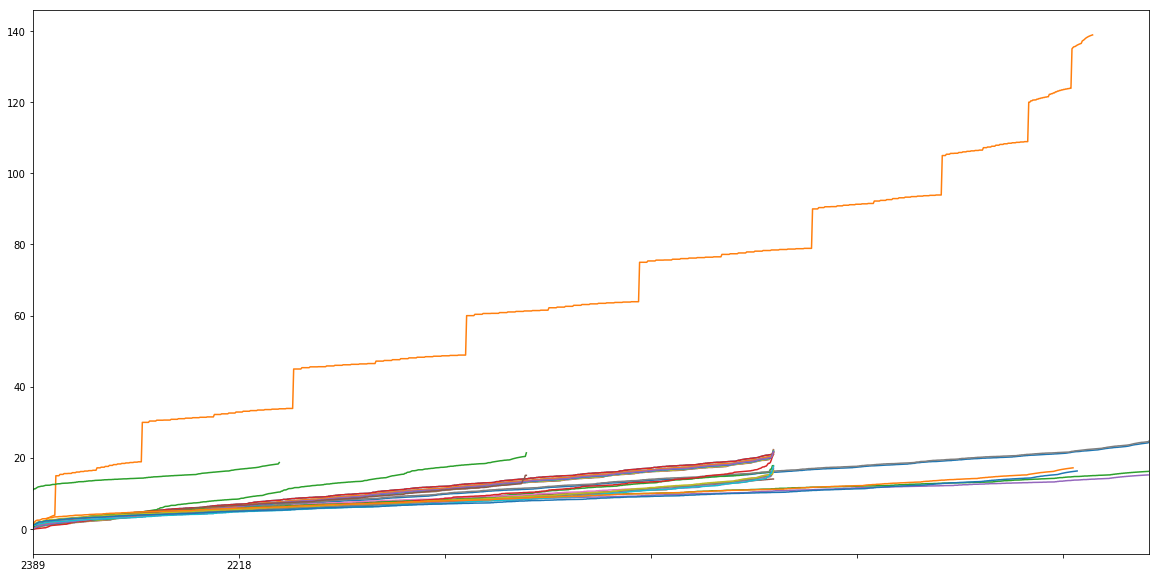

In [6]:
## Sanity check to make sure the optimal parameter set is within range.
## The below plot should be multiple 'V' shaped curves with a 0 minimum.
par_stat_preprocessed = par_stat_preprocessed.sort_values('opt_delta')

for project_name in par_stat_preprocessed['project_name'].unique():

    par_stat_preprocessed.loc[par_stat_preprocessed['project_name'] == project_name, 'opt_delta'].plot(figsize = (20, 10))

33
25122


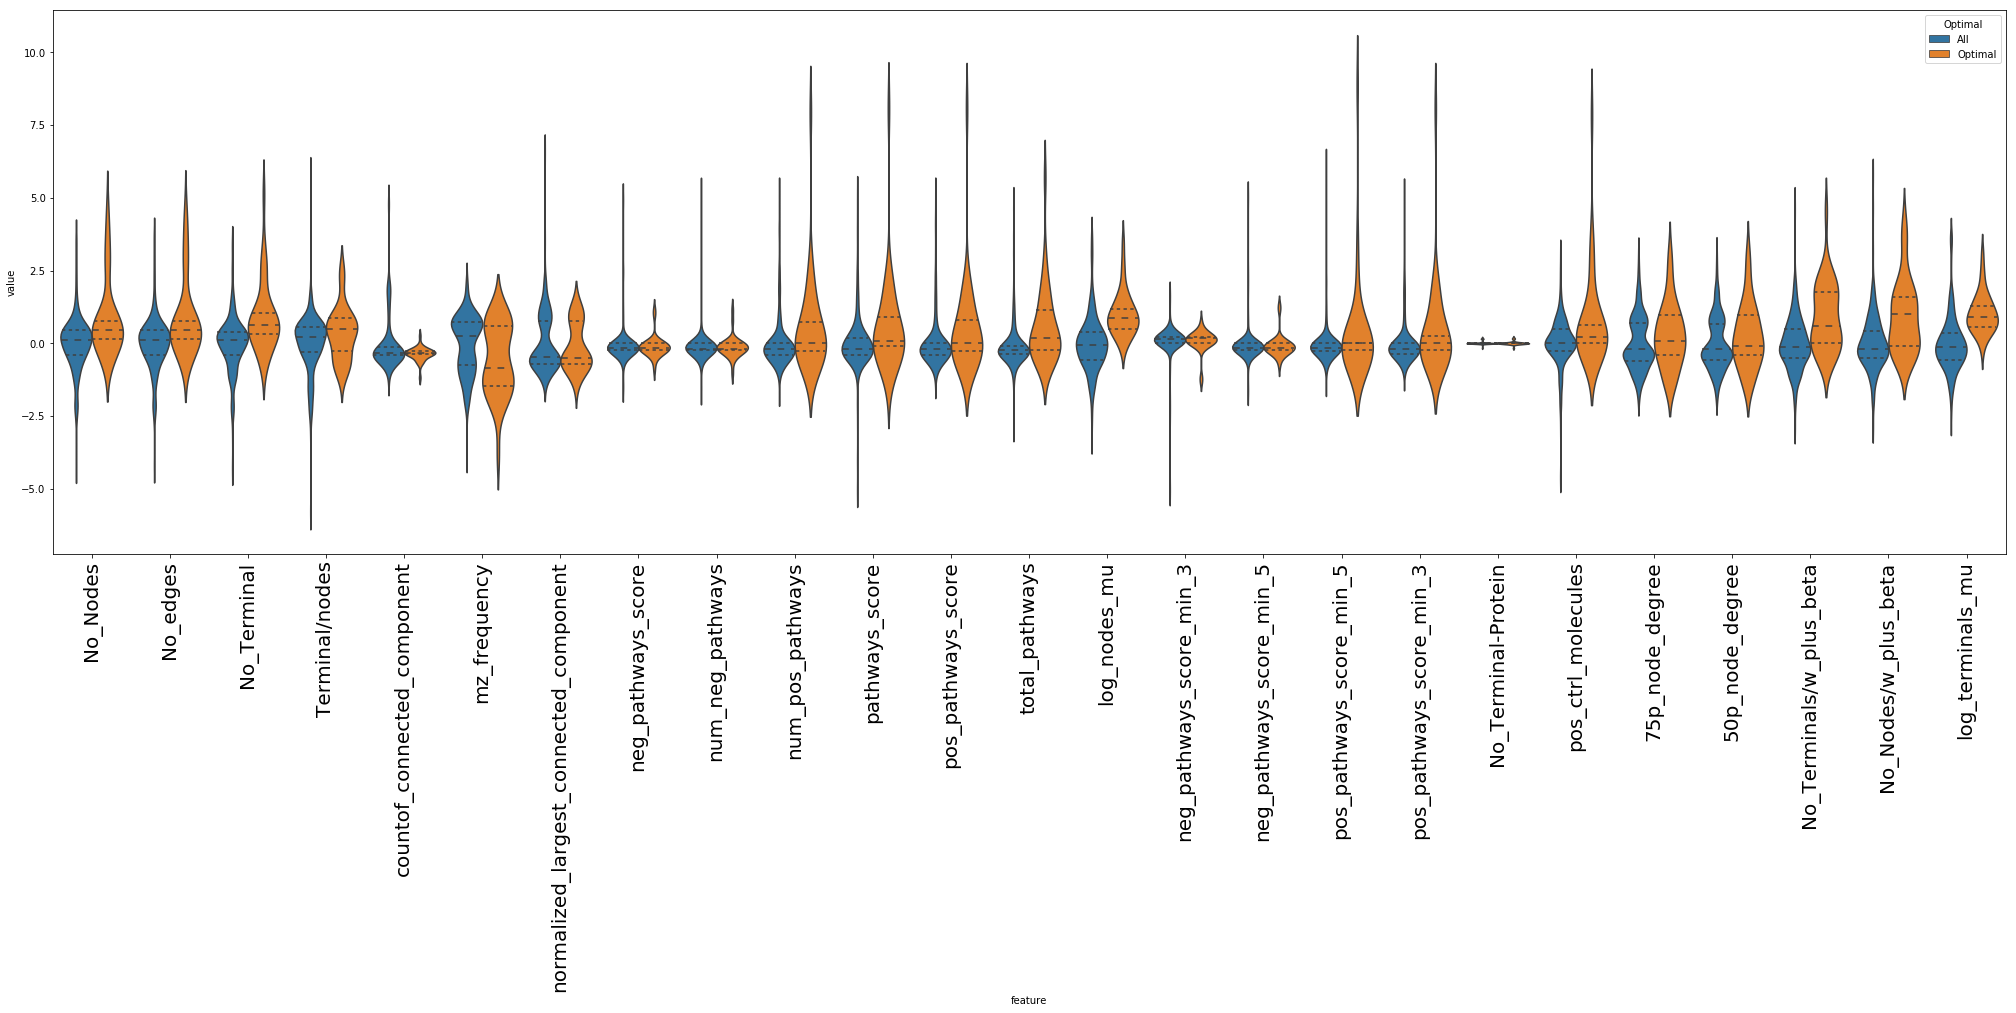

In [1088]:
snsplots(par_stat_preprocessed, col_set_2, plot_type = 'violin')

33
25122


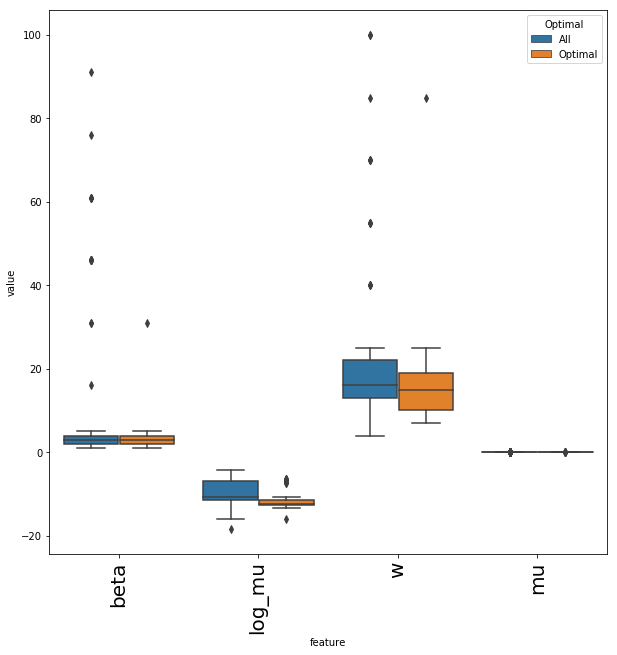

In [18]:
snsplots(par_stat_preprocessed, col_set_1, plot_type = 'box')

In [8]:
def experiment_10(plot_df, col_set):
    
    t_test_stats = pd.DataFrame()
    
    plot_df_opt = plot_df[plot_df['Optimal'] == True]
    
    for col in col_set:
        
        t_test_stats.at[col, 't_statistic'] = ttest_ind(plot_df[col], plot_df_opt[col])[0]
        t_test_stats.at[col, 'p_val'] = ttest_ind(plot_df[col], plot_df_opt[col])[1]

    return t_test_stats[t_test_stats['p_val'] < 0.001]
    

In [9]:
experiment_10(par_stat_preprocessed, col_set_1).sort_values('p_val')

,t_statistic,p_val


#**Experiment 1**

# **Feature Engineering**

In [330]:
def experiment_4(par_stat_preprocessed, col_set, group_by):
        
        
    ############ ScatterPlot ################################
    colors = plt.cm.get_cmap('Set1').colors
    
    plot_df, projected, explained_variance, components = get_clusters(par_stat_preprocessed, '', col_set, n_components = 5)

    plot_df['color'] = '#0000'
    
    #plot_df = plot_df[plot_df['project_name'] == '28_kovsmock_24h_met_01']
    
    for component in components.columns:
        components[component] = components[component] * explained_variance[component]
    

    plt.figure(figsize=(15,10))
    
    selected_components = ['component_0', 'component_1', 'component_2', 'component_3', 'component_4']
    
    for i, group in enumerate(plot_df[group_by].unique()):
        
        plot_df.at[plot_df[group_by] == group, 'color'] = matplotlib.colors.to_hex(colors[i % len(colors)])
    
    plot_df_opt = plot_df.loc[par_stat_preprocessed['Optimal'] == True]

    anomalies_df = plot_df.loc[(plot_df['component_0'] > 12) & (plot_df['Optimal'] == True)]

    plt.scatter(plot_df[selected_components[0]], plot_df[selected_components[1]],
                label = 'All parameters',
                #c    = plot_df['project_name'].astype("category").cat.codes,
                #cmap = plt.cm.get_cmap('tab20', len(plot_df['project_name'].unique())),
                #c = plot_df['mz/nodes'],
                #cmap = plt.cm.get_cmap('RdBu_r', 25),
                c = list(plot_df['color']),
                edgecolor ='none', alpha=0.2, s = 45)
    
    #plt.colorbar()
    
    plt.scatter(plot_df_opt[selected_components[0]], plot_df_opt[selected_components[1]],
                #c    = plot_df_opt['project_name'].astype("category").cat.codes,
                #cmap = plt.cm.get_cmap('tab20', len(plot_df_opt['project_name'].unique())),
                c = list(plot_df_opt['color']),
                label = 'Optimal Parameters',
                edgecolor ='Black', alpha=1, s = 100, marker = 'X')
    
    plt.scatter(anomalies_df[selected_components[0]], anomalies_df[selected_components[1]],
                #c    = plot_df_opt['project_name'].astype("category").cat.codes,
                #cmap = plt.cm.get_cmap('tab20', len(plot_df_opt['project_name'].unique())),
                c = list(plot_df_opt['color']),
                label = 'Anomalous Optimal Parameters',
                edgecolor ='Black', alpha=1, s = 100, marker = '*')
    
    plt.legend()

    plt.xlabel('component 0 (Explained Variance: %.2f)' % explained_variance[0], fontsize=20)
    plt.ylabel('component 1 (Explained Variance: %.2f)' % explained_variance[1], fontsize=20)
    
    #for group_name in plot_df[group_by].unique():
    #    plt.text(plot_df.loc[plot_df[group_by] == group_name, selected_components[0]].mean(),
    #               plot_df.loc[plot_df[group_by] == group_name, selected_components[1]].mean(),
    #                  group_name, fontsize = 20)

    ############### BarChart #################################
    
    components.plot.bar(figsize=(15,10), fontsize=20, title = 'Feature Importance')
    
    plt.figure(figsize=(15,10))
   
    plt.bar(x = range(len(explained_variance)), height = explained_variance, zorder = 10)
    plt.plot([sum(explained_variance[:i+1]) for i,v in enumerate(explained_variance)], color = 'r', zorder = 20)
    plt.ylabel('Cumulative Variance Explained' % explained_variance[0], fontsize=20)
    plt.xlabel('Number of Components' % (explained_variance[1]), fontsize=20)
    
    #print(plot_df[col_set].columns[plot_df[col_set].nunique() == 1])
    
    
    ################ Hierarchical Clustering #################
    
    plot_df['Optimal'] = plot_df['Optimal'].astype(str)
    
    fig = sns.clustermap(plot_df[col_set + ['Optimal']].set_index('Optimal'), 
                            cmap="RdBu_r",
                            method="ward",
                            robust=True,
                            figsize=(15, 10),
                            center = 0,
                            z_score=0)
    
    
    ############# Heirarchical Clustering PCA ###############
    


    g = sns.clustermap(plot_df[selected_components + ['par_combination']].set_index('par_combination'), 
                            cmap="RdBu_r",
                            method="ward",
                            robust=True,
                            figsize=(15, 10),
                            center = 0,
                            z_score=0)
    
    plot_df['cluster'] = scipy.cluster.hierarchy.fcluster(g.dendrogram_row.linkage, t = 3, criterion='maxclust')
    
    
    
    ############### 3D Scatter Plot ###########################
    
    fig    = plt.figure(figsize=(15,10))
    ax     = Axes3D(fig, rect=[0, 0, 1.25, 1], elev=45, azim=-120)
    #markers= ['o', 'x']

    p = ax.scatter(plot_df[selected_components[0]], plot_df[selected_components[1]], plot_df[selected_components[2]],
                   c    = list(plot_df['color']),
                   #c = plot_df['mz/nodes'],
                   alpha = 0.25,
                   s = 120,  cmap = 'tab20')
    
    #fig.colorbar(p)
    
    p = ax.scatter(plot_df_opt[selected_components[0]], plot_df_opt[selected_components[1]], plot_df_opt[selected_components[2]],
               #c    = plot_df['project_name'].astype("category").cat.codes,
               c = list(plot_df_opt['color']),
               marker = 'x',
               alpha = 1,
               edgecolor='black',
               s = 3000)
    
        
    #for group_name in plot_df[group_by].unique():
    #    plt.text(plot_df.loc[plot_df[group_by] == group_name, selected_components[0]].mean(),
    #               plot_df.loc[plot_df[group_by] == group_name, selected_components[1]].mean(),
    #                 plot_df.loc[plot_df[group_by] == group_name, selected_components[2]].mean(),
    #                  group_name, fontsize = 20)

    ax.set_xlabel('component 0 (Explained Variance: %.2f)' % explained_variance[0], fontsize=20)
    ax.set_ylabel('component 1 (Explained Variance: %.2f)' % explained_variance[1], fontsize=20)
    ax.set_zlabel('component 2 (Explained Variance: %.2f)' % explained_variance[2], fontsize=20)

    #fig.legend(p)
    
    return explained_variance, components, plot_df, clusters, den, g

In [19]:
print(par_stat_preprocessed[col_set_2].columns[par_stat_preprocessed[col_set_2].nunique() == 1])

Index([], dtype='object')


In [20]:
{i: len(v) for i,v in cluster.items()}

NameError: name 'cluster' is not defined

In [21]:
plot_df['cluster'].value_counts()

NameError: name 'plot_df' is not defined

In [427]:
for cluster in plot_df['cluster'].unique():

    print('-' * 100)
    print(cluster)
    print(plot_df.loc[(plot_df['Optimal'] == 'True') & (plot_df['cluster'] == cluster), 'project_name'])

----------------------------------------------------------------------------------------------------
3
692                     21_mock_0vs24h_met_01
765                 22_mock_regression_met_01
3644                       26_ko_union_met_01
5804                 29_kovsmock_union_met_01
7229             211_ko_regression_met_01_rna
7966                  212_ko_union_met_01_rna
9332               213_mock_0vs24h_met_01_rna
11564      217_kovsmock_24h_met_01_rna_slc1a5
12284        218_kovsmock_union_met_01_slc1a5
13547                 11_mock_super_union_met
14753            13_ko_super_union_met_slc1a5
16253           15_kovsmock_0h_met_slc1a5_rna
16601          16_kovsmock_24h_met_slc1a5_rna
17229                17_mock_vs_ko_mega_union
1831                  39_fs_rwt_serum_met_rna
3155                  35_fs_rwt_heart_met_rna
3650                      34_fs_rwt_heart_met
5967                  32_binary_heart_met_rna
926      502_healthy_vs_mild_severe_met_lipid
Name: project_name, dty

Explained variance of PCA axes: [0.43195224 0.14275023 0.11338072 0.09806178 0.04187476]


/opt/conda/lib/python3.6/site-packages/matplotlib/colorbar.py:217: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


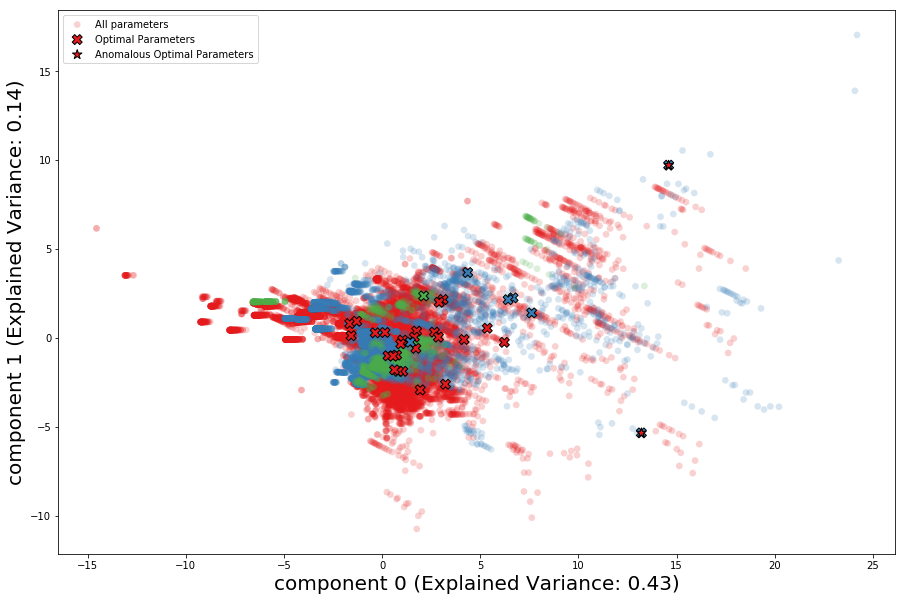

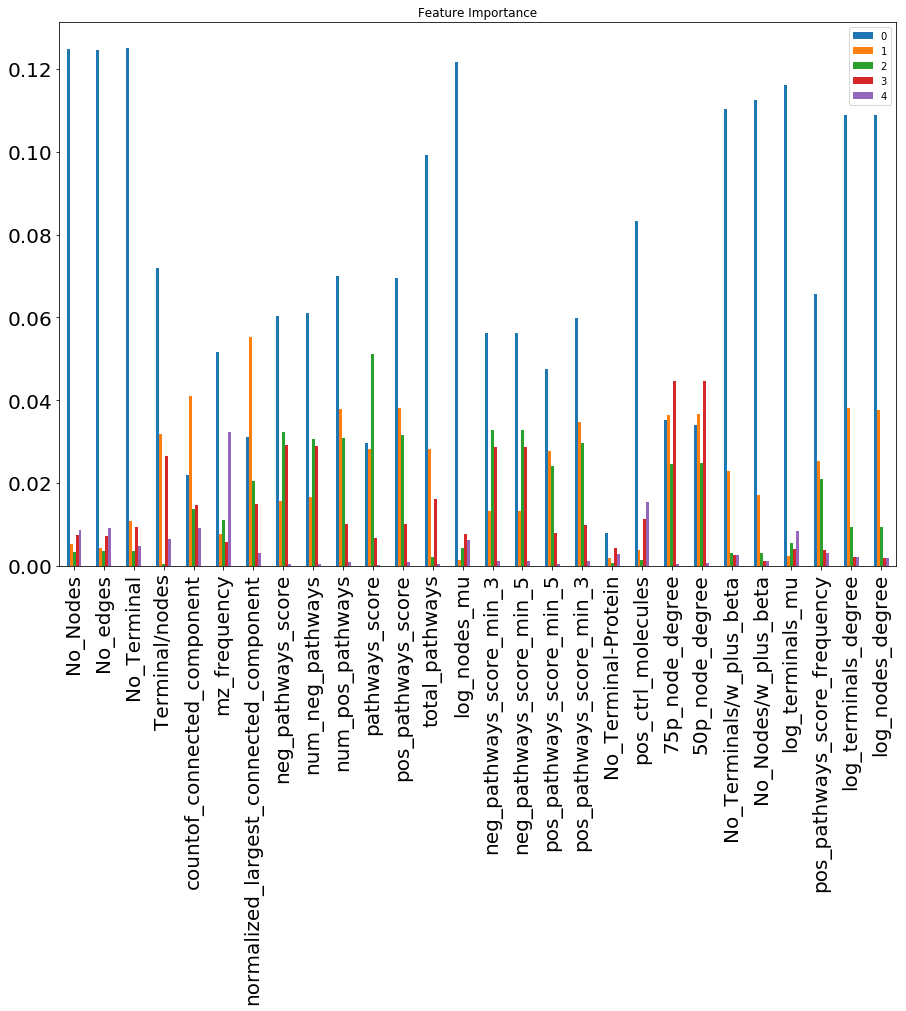

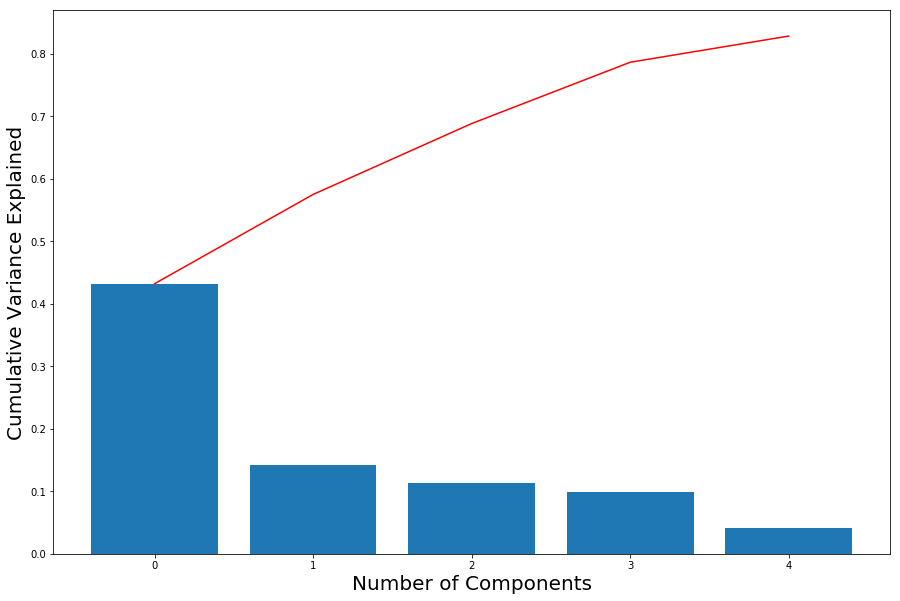

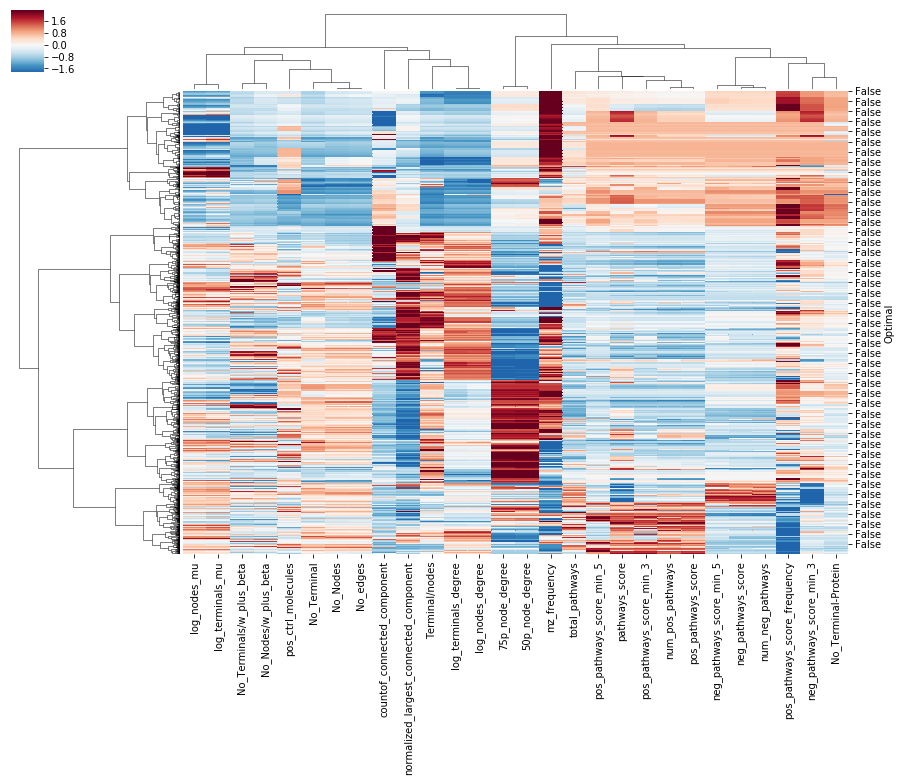

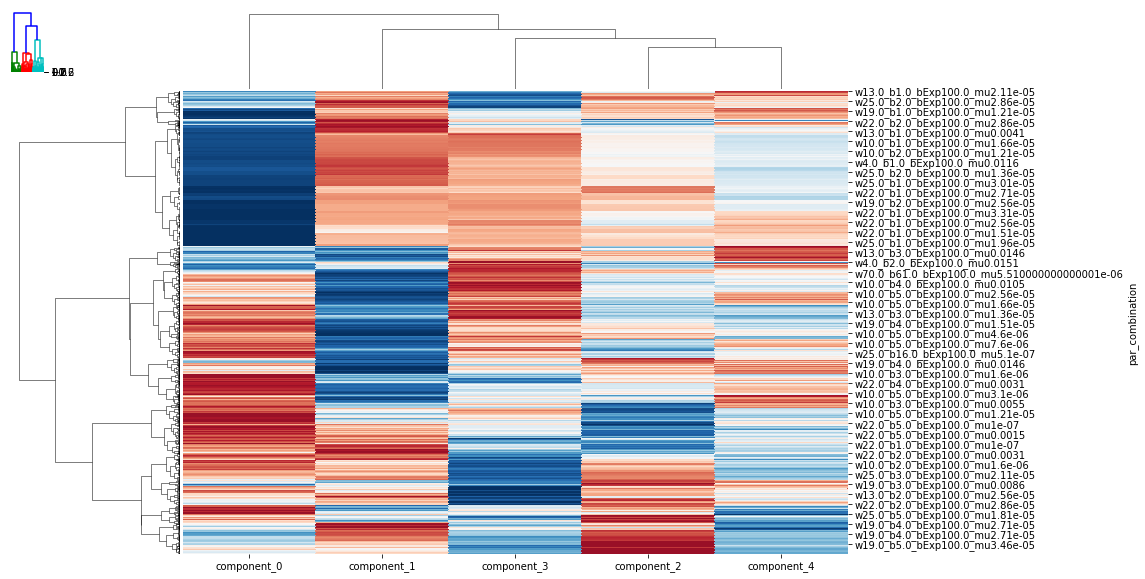

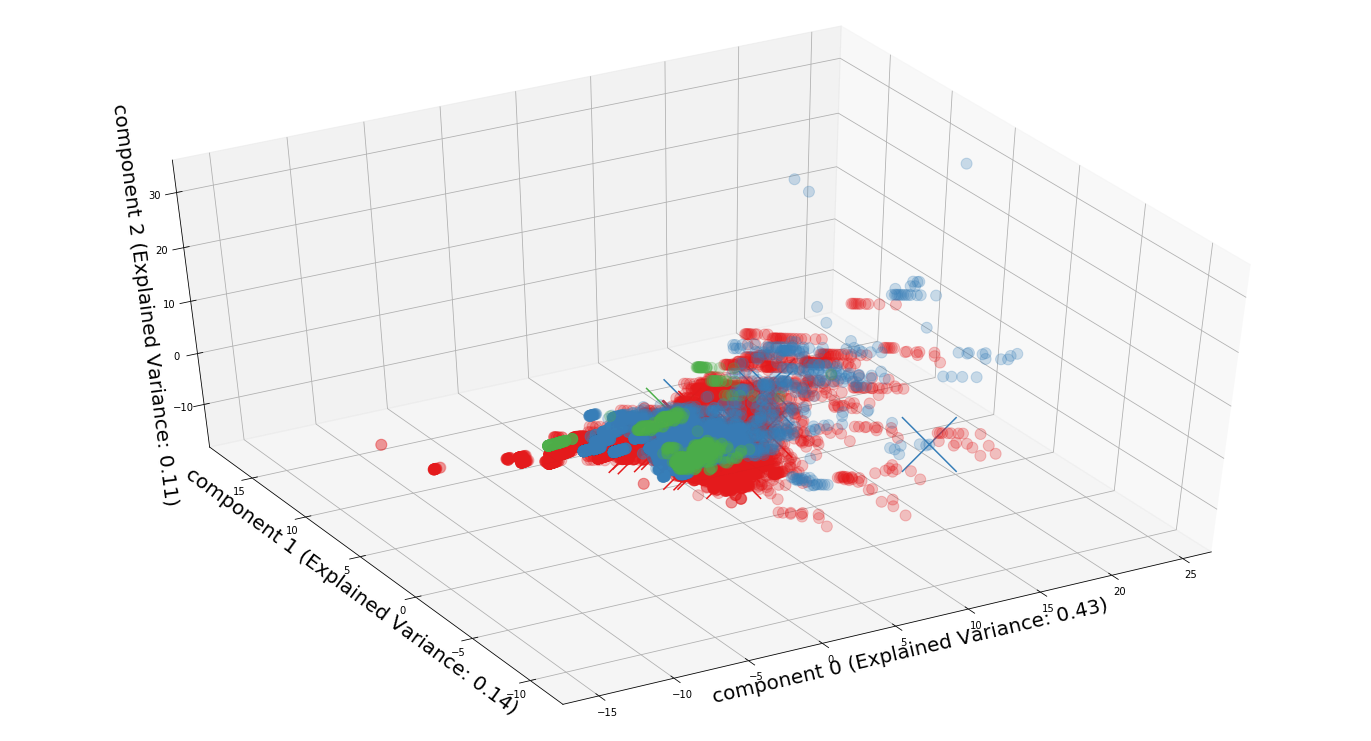

In [373]:
explained_variance, components, plot_df, cluster, den, g = experiment_4(par_stat_preprocessed.copy(), col_set_2, 'project')

In [92]:
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))


def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage


def experiment_13(plot_df, col_set):
    
    
    
    fig    = plt.figure(figsize=(15,10))
    dist_mat = squareform(pdist(par_stat_preprocessed[col_set_2].corr(), 'correlation'))
    #dist_mat = np.array(par_stat_preprocessed[col_set_2][col_set_2].corr())
    #plt.hist(dist_mat)
    
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,'ward')
    
    N = len(par_stat_preprocessed[col_set_2][col_set_2].corr())
    fig    = plt.figure(figsize=(15,10))
    plt.pcolormesh(ordered_dist_mat, cmap = 'RdBu_r')
    plt.colorbar()
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.xticks(np.arange(len(col_set_2)), col_set_2, rotation=90)
    plt.yticks(np.arange(len(col_set_2)), col_set_2)
    #plt.xlabel()

    plt.show()
    
    return

<Figure size 1080x720 with 0 Axes>

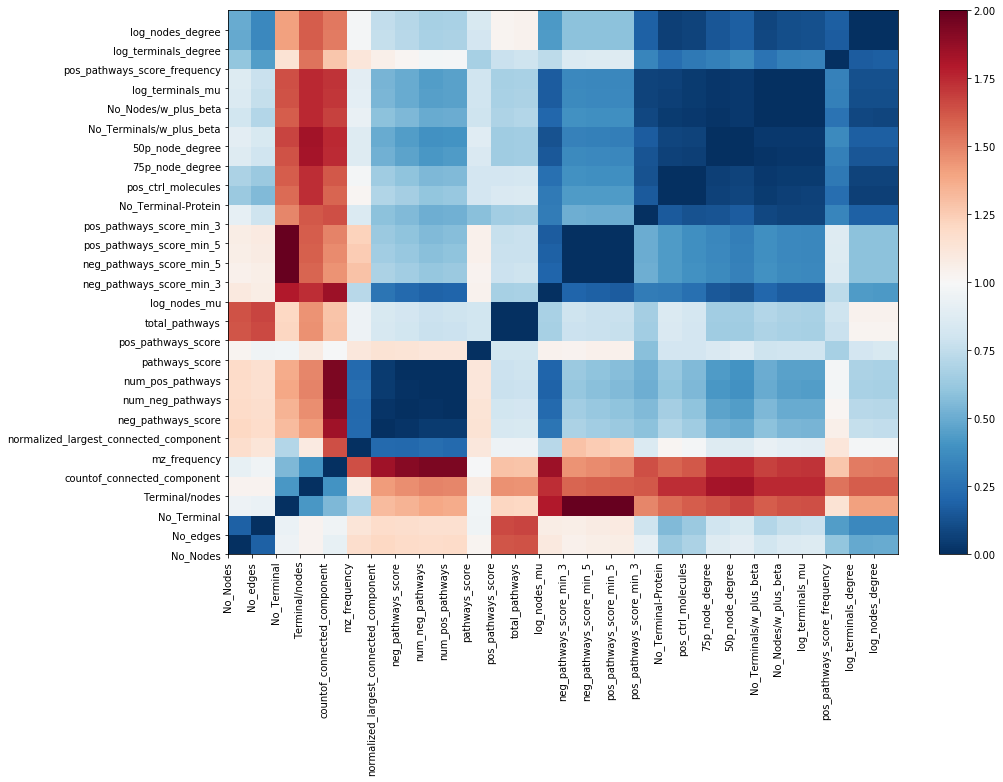

In [93]:
experiment_13(par_stat_preprocessed, col_set_2)

In [116]:
def experiment_14(plot_df, col_set):
    
    
    #time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(plot_df[col_set])

    colors = plt.cm.get_cmap('Set1').colors


    #print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    plot_df['tsne-2d-one'] = tsne_results[:,0]
    plot_df['tsne-2d-two'] = tsne_results[:,1]
    plt.figure(figsize=(20,15))
    plot_df_opt = plot_df[plot_df['Optimal'] == True]

    
    labels = []
    projects = plot_df['project'].unique()
    
    for i, project in enumerate(projects):
        

        labels.append(plt.scatter(plot_df.loc[plot_df['project'] == project, "tsne-2d-one"], plot_df.loc[plot_df['project'] == project, "tsne-2d-two"],
                        label = project,
                        c = colors[i],
                        #c    = plot_df['project'].astype("category").cat.codes,
                        #cmap = plt.cm.get_cmap('Set1', len(plot_df['project_name'].unique())),
                        edgecolor ='none', alpha=0.2, s = 45))
    
    for i, project in enumerate(projects):
        
        labels.append(plt.scatter(plot_df_opt.loc[plot_df_opt['project'] == project, "tsne-2d-one"], plot_df_opt.loc[plot_df_opt['project'] == project, "tsne-2d-two"],
                      #c    = plot_df_opt['project'].astype("category").cat.codes,
                      #cmap = plt.cm.get_cmap('Set1', len(plot_df_opt['project_name'].unique())),
                      c = colors[i],
                      label = project + 'Optimal',
                      edgecolor ='Black', alpha=1, s = 500, marker = 'X'))
    
    #plt.legend(labels, projects)
    plt.legend()
    


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 25155 samples in 0.066s...
[t-SNE] Computed neighbors for 25155 samples in 5.807s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25155
[t-SNE] Computed conditional probabilities for sample 2000 / 25155
[t-SNE] Computed conditional probabilities for sample 3000 / 25155
[t-SNE] Computed conditional probabilities for sample 4000 / 25155
[t-SNE] Computed conditional probabilities for sample 5000 / 25155
[t-SNE] Computed conditional probabilities for sample 6000 / 25155
[t-SNE] Computed conditional probabilities for sample 7000 / 25155
[t-SNE] Computed conditional probabilities for sample 8000 / 25155
[t-SNE] Computed conditional probabilities for sample 9000 / 25155
[t-SNE] Computed conditional probabilities for sample 10000 / 25155
[t-SNE] Computed conditional probabilities for sample 11000 / 25155
[t-SNE] Computed conditional probabilities for sample 12000 / 25155
[t-SNE] Computed conditional probabilities for sa

No handles with labels found to put in legend.


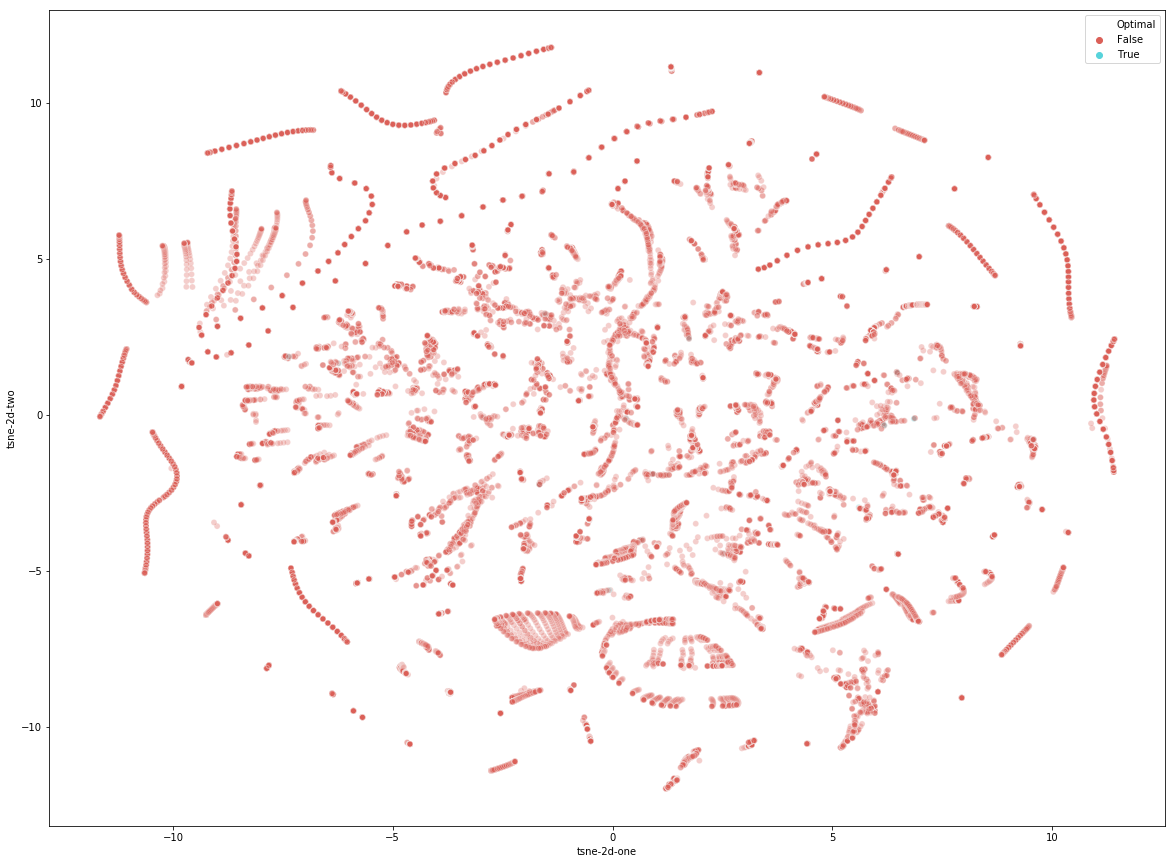

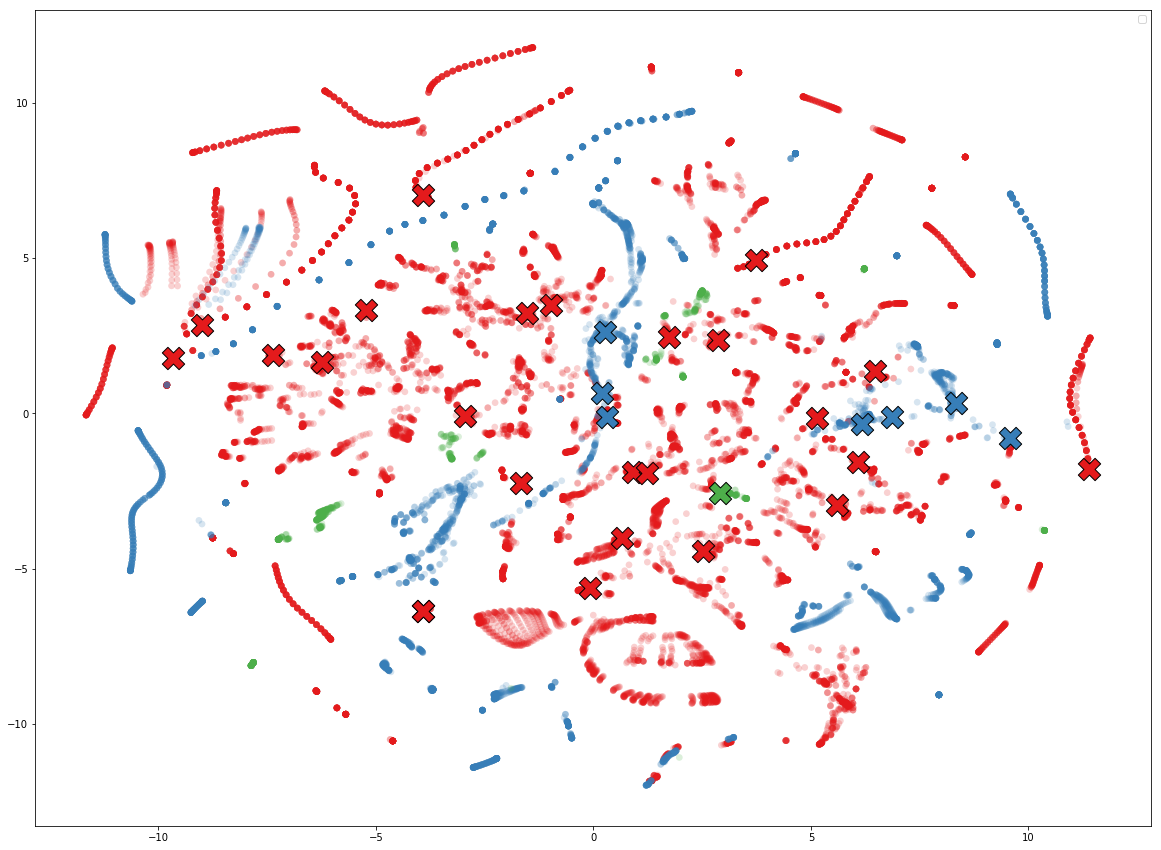

In [117]:
experiment_14(par_stat_preprocessed.copy(), col_set_2)

## **Further Feature Engineering - NMF**

In [5]:
def experiment_5(plot_df, col_set, group_by):
    
    colors = plt.cm.get_cmap('Set1').colors
    
    #print(plot_df['project'].str[1:])

    plot_df['project'] = plot_df['project'].str[1:]
    
    
    plt.figure(figsize=(15,10))    
    X = plot_df[col_set_2]
    
    model = NMF(n_components=5, init='random', random_state=0)
    weights = model.fit_transform(X)
    components = model.components_
    
    selected_components = ['component_0', 'component_1', 'component_2', 'component_3', 'component_4']
    
    for i, component in enumerate(selected_components):   
        
        #print(par_stat_preprocessed.loc[:,component].shape)
        #print(np.array(weights).T[i])
        plot_df.loc[:,component] = np.array(weights).T[i]
    
    plot_df_opt = plot_df[plot_df['Optimal'] == True]

    
    labels = []
    projects = plot_df['project'].unique()
    
    for i, project in enumerate(projects):
        

        labels.append(plt.scatter(plot_df.loc[plot_df['project'] == project, selected_components[0]], plot_df.loc[plot_df['project'] == project, selected_components[1]],
                        label = project,
                        c = colors[i],
                        #c    = plot_df['project'].astype("category").cat.codes,
                        #cmap = plt.cm.get_cmap('Set1', len(plot_df['project_name'].unique())),
                        edgecolor ='none', alpha=0.2, s = 45))
    
    for i, project in enumerate(projects):
        
        labels.append(plt.scatter(plot_df_opt.loc[plot_df_opt['project'] == project, selected_components[0]], plot_df_opt.loc[plot_df_opt['project'] == project, selected_components[1]],
                      #c    = plot_df_opt['project'].astype("category").cat.codes,
                      #cmap = plt.cm.get_cmap('Set1', len(plot_df_opt['project_name'].unique())),
                      c = colors[i],
                      label = project + 'Optimal',
                      edgecolor ='Black', alpha=1, s = 100, marker = 'X'))
    
    #plt.legend(labels, projects)
    plt.legend()
    
    for group_name in plot_df[group_by].unique():
        plt.text(plot_df.loc[plot_df[group_by] == group_name, selected_components[0]].mean(),
                   plot_df.loc[plot_df[group_by] == group_name, selected_components[1]].mean(),
                      group_name, fontsize = 20)

    nmf_components = pd.DataFrame()
    
    for component in components:
            
        if type(nmf_components) == pd.DataFrame:
            
            nmf_components = pd.concat([nmf_components, pd.DataFrame.from_dict({col_set[i]: abs(c) for i, c in enumerate(component)}, orient = 'index')], axis = 1)
        
        else:
            nmf_components = pd.DataFrame.from_dict({col_set[i]: abs(c) for i, c in enumerate(component)}, orient = 'index')

    nmf_components.columns = list(range(len(selected_components)))

    nmf_components.plot.bar(figsize=(15,10), fontsize=20, title = 'Feature Importance')


    
    return
    

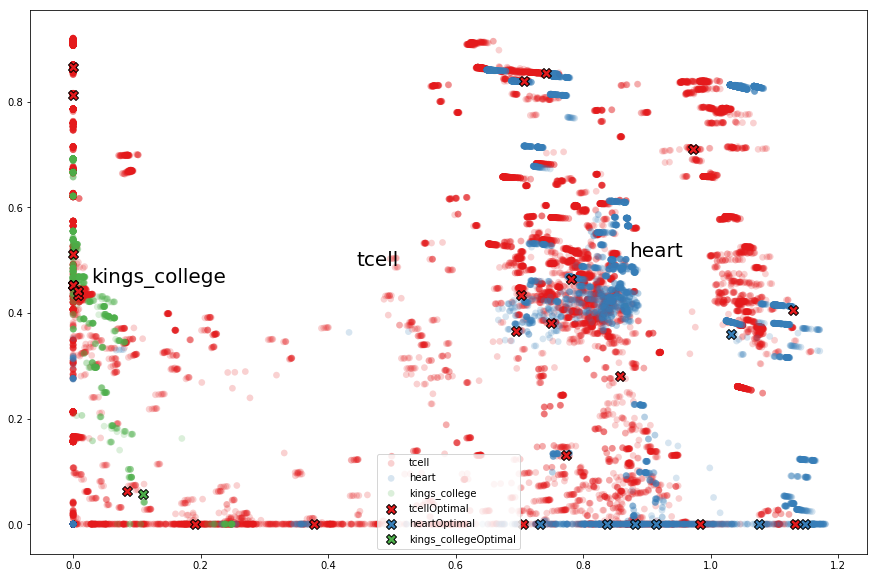

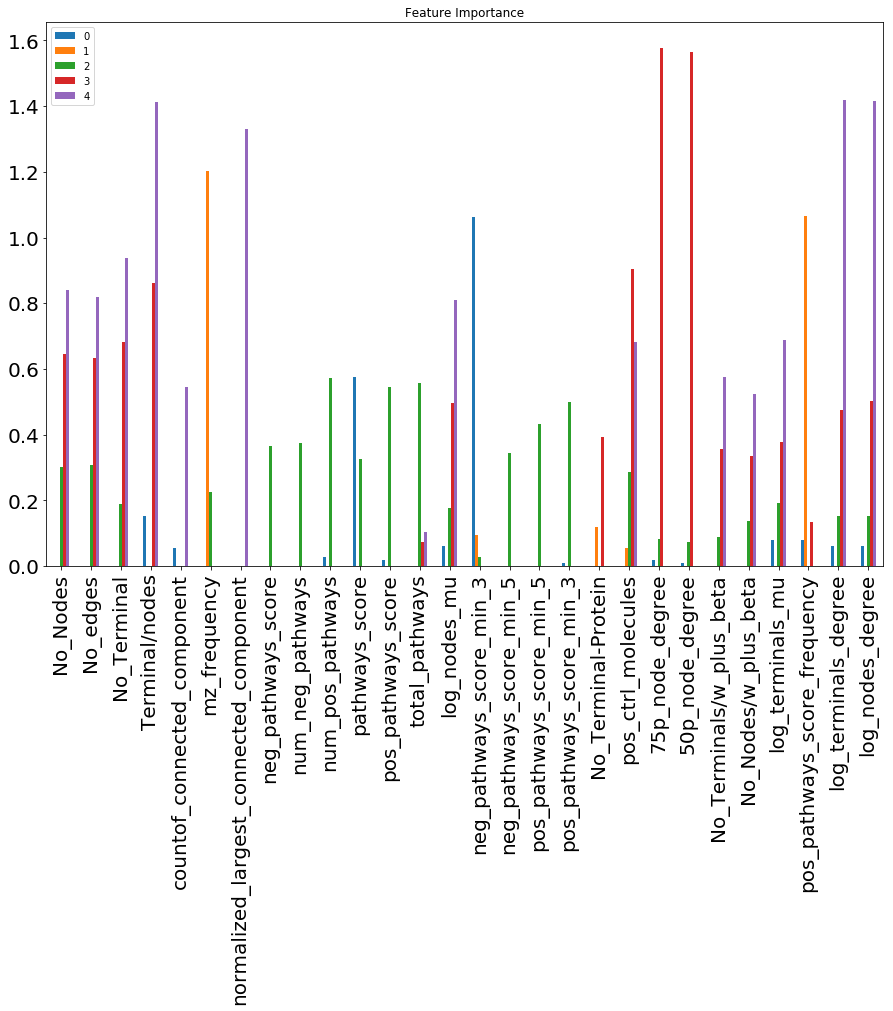

In [8]:
experiment_5(par_stat_preprocessed.copy(), col_set_2, 'project')

# Classification

In [177]:
def classify(multiprocessing_input):
    
    classification_method = 'one_class'
    
    X_train, X_test, y_train, y_test = zip(*multiprocessing_input)
   
    if classification_method == 'one_class':
        clf       = svm.OneClassSVM(gamma='auto_deprecated', kernel = 'rbf', shrinking = True)

    elif classification_method == 'multi_class':
        clf       = svm.SVC(gamma='scale', kernel = 'sigmoid', class_weight = 'balanced', probability = True)
        
    else: print('Option not correctly specified')

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    if classification_method == 'one_class':
        y_pred = [True if i == -1 else False for i in y_pred]

    confusion_results = confusion_matrix(y_test, y_pred)
    roc_auc_scores     = roc_auc_score(y_test, y_pred)
    #print('')
    #print(confusion_results)
    
    #return confusion_results

    return (confusion_results, roc_auc_scores)



def experiment_11(par_stat_preprocessed, col_set, classification_method = 'one_class', validation = 'kfold'):

    ## PCA + SVM
    validation_count = 16
    prediction_scores = []
    
    
    ### FILTERING BY PROJECT #####
    par_stat_preprocessed = par_stat_preprocessed.loc[par_stat_preprocessed['project'] == '_heart']
    
    colors = plt.cm.get_cmap('Set1').colors

    plot_df, projected, explained_variance, components = get_clusters(par_stat_preprocessed, '', col_set, n_components = 5)
    plot_df_opt = plot_df.loc[plot_df['Optimal'] == True]
    
    X         = np.array(plot_df[['component_1', 'component_2', 'component_0', 'component_3', 'component_4']])
    y         = np.array(plot_df['Optimal'])
    
    multiprocessing_input = []
    
    for v in range(validation_count):
        
        if validation == 'kfold':
            
            kf = StratifiedKFold(n_splits = 5)
            kf.get_n_splits(X)
            
            for train_index, test_index in kf.split(X, y):
                X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
                multiprocessing_input.append(list(zip(X_train, X_test, y_train, y_test)))
        
        else:
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
            multiprocessing_input.append(list(zip(X_train, X_test, y_train, y_test)))
        
    
    p = Pool(5)
    results = p.map(classify, multiprocessing_input)

    confusion_results = [result[0] for result in results]
    roc_auc_scores  = [result[1] for result in results]
    
    
    precision = [confusion_result[1][1] / (confusion_result[1][1] + confusion_result[0][1]) for confusion_result in confusion_results]
    recall = [confusion_result[1][1] / (confusion_result[1][1] + confusion_result[1][0]) for confusion_result in confusion_results]
    
    #print(confusion_results)
    print('Mean Recall %f' % np.mean(recall))
    print('Mean Precision %f' % np.mean(precision))
    print('Mean ROC %f' % np.mean(roc_auc_scores))
    print('Warning: Plot is not based on cross validated results.')
        
    
    
    
    #plot_df['class_probabilty'] = clf.predict(X)
        
    plt.figure(figsize=(15,10))
    plt.hist(recall)
    
    #plt.scatter(plot_df['component_0'], plot_df['component_1'],
    #            c    = [colors[0] if i == True else colors[1] for i in list(plot_df['class_probabilty'])],
    #            cmap = plt.cm.get_cmap('Set1', 2),
    #            edgecolor ='none', alpha=0.5, s = 45)
    
    #plt.colorbar()
    #plt.scatter(plot_df_opt['component_0'], plot_df_opt['component_1'],
    #            c    = ['Green' for i in list(plot_df_opt['Optimal']) ],
    #            label = 'Optimal Parameters',
    #            edgecolor ='Black', alpha=1, s = 555, marker = 'X')




    plt.xlabel('Recall (mean: %s)' % np.mean(recall), fontsize=20)
    plt.ylabel('Count', fontsize=20)
    
    #plt.legend()
    
    return confusion_results

Explained variance of PCA axes: [0.46592899 0.15703355 0.12538978 0.08121278 0.05247942]


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

Mean Recall 1.000000
Mean Precision 0.001298
Mean ROC 0.544167


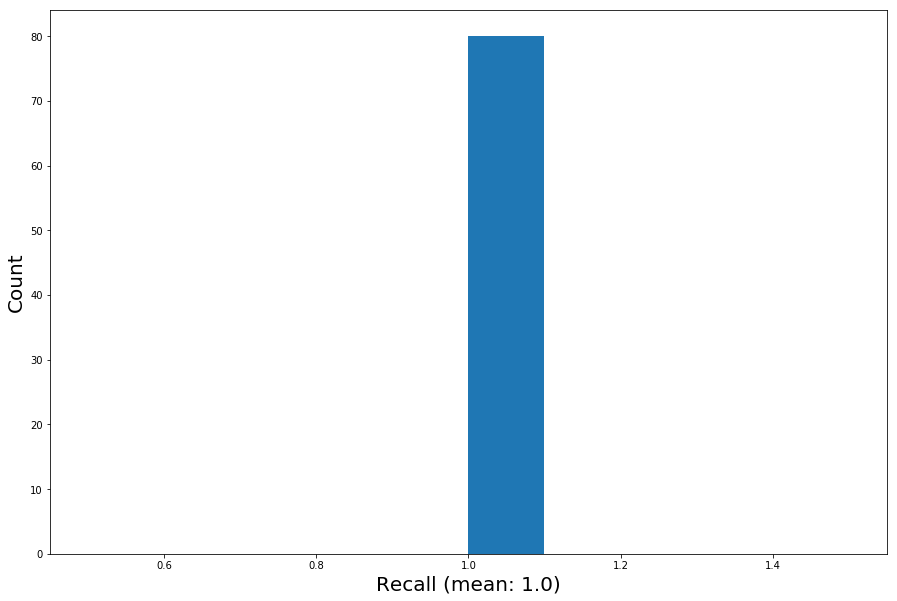

In [178]:
confusion_results = experiment_11(par_stat_preprocessed.copy(), col_set_2, classification_method = 'one_class', validation = 'kfold')

In [ ]:
def experiment_3(plot_df, col_set):
    
    
    X         = plot_df[[ i for i in col_set if i not in ['Optimal']]]
    y         = plot_df['Optimal']
    
    #clf = tree.DecisionTreeClassifier(max_depth = 60, min_weight_fraction_leaf = 0.0001, min_samples_split = 0.0001)
    clf = tree.DecisionTreeClassifier(max_depth = 4)
    clf = clf.fit(X, y)
    
    dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=[ i for i in col_set if i not in ['Optimal']],  
                      class_names= ['Optimal', 'Not Optimal'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
    
    graph = graphviz.Source(dot_data) 
    
    
    
    return graph

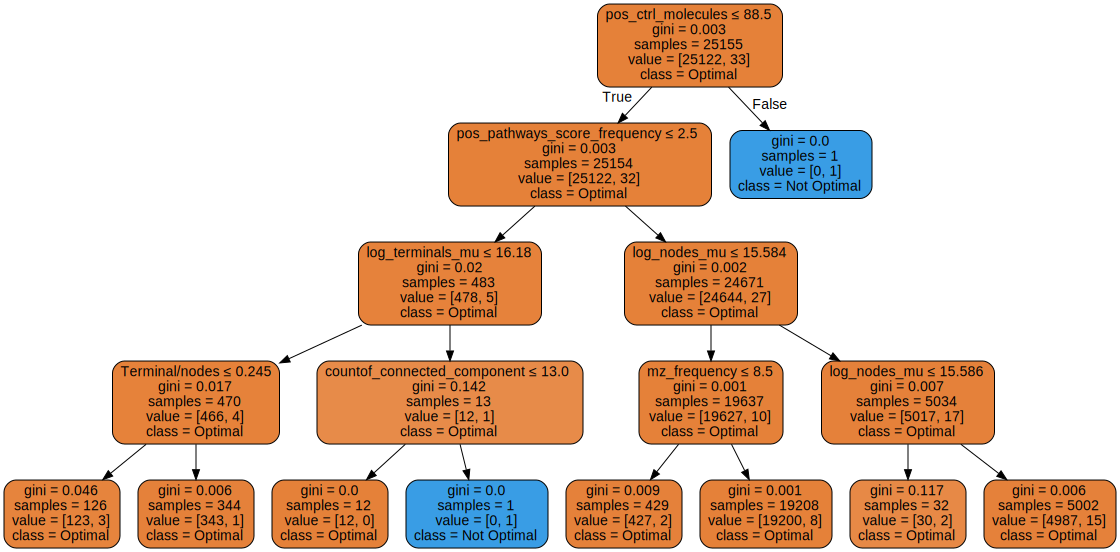

In [151]:
experiment_3(par_stat_preprocessed, col_set_2)

In [96]:
def vip(x, y, model):
    ### calculating VIP score 
    # SEE: https://github.com/scikit-learn/scikit-learn/issues/7050
    t = model.x_scores_
    w = model.x_weights_
    q = model.y_loadings_
    m, p = x.shape
    _, h = t.shape
    vips = np.zeros((p,))
    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)
    for i in range(p):
        weight = np.array([ (w[i,j] / np.linalg.norm(w[:,j]))**2 for j in range(h) ])
        vips[i] = np.sqrt(p*(s.T @ weight)/total_s)
    return vips


def experiment_6(plot_df, col_set):
    
    #plot_df = plot_df.loc[plot_df['project'] == '_heart']
    
    #plot_df = plot_df.loc[~(plot_df['project_name'] == '32_binary_heart_met_rna') &
    #                      ~(plot_df['project_name'] == '38_binary_serum_met_rna')]
    
    X         = plot_df[[ i for i in col_set if i not in ['Optimal']]]
    Y         = plot_df['Optimal']
    
    pls2      = PLSRegression(n_components=5)

    pls2.fit(X, Y)
    
    vips = vip(X, Y, pls2)
    
    plot_df['PLSR_pred']   = pls2.predict(X)
    plot_df['component_0'] = np.array(pls2.x_scores_).T[0]
    plot_df['component_1'] = np.array(pls2.x_scores_).T[1]
    plot_df_opt            = plot_df.loc[plot_df['Optimal'] == True]
    
    
    selected_components = ['component_0', 'component_1', 'component_2', 'component_3', 'component_4']


    
    print(pls2.x_weights_.shape,
         pls2.y_weights_.shape,
         pls2.x_loadings_.shape,
         pls2.y_loadings_.shape,
         pls2.x_scores_.shape,
         pls2.y_scores_.shape)
    
    
    plt.figure(figsize=(25,15))
    plt.scatter(plot_df['component_0'], plot_df['component_1'],
                c    = plot_df['project'].astype("category").cat.codes,
                cmap = plt.cm.get_cmap('rainbow', 5),
                label = 'All Parameters',
                edgecolor ='none', alpha=0.1, s = 45)
    
    plt.scatter(plot_df_opt['component_0'], plot_df_opt['component_1'],
                c    = plot_df_opt['project'].astype("category").cat.codes,
                cmap = plt.cm.get_cmap('rainbow', 5), marker = 'X',
                label = 'Optimal',
                edgecolor ='Black', alpha=1, s = 450)
    
    plt.title('PLSR Plot')
    plt.xlabel('component 1', fontsize=20)
    plt.ylabel('component 2', fontsize=20)
    plt.legend()
    
    components = pls2.x_loadings_.T
    
    nmf_components = pd.DataFrame()
    
    for component in components:
            
        if type(nmf_components) == pd.DataFrame:
            
            nmf_components = pd.concat([nmf_components, pd.DataFrame.from_dict({col_set[i]: abs(c) for i, c in enumerate(component)}, orient = 'index')], axis = 1)
        
        else:
            nmf_components = pd.DataFrame.from_dict({col_set[i]: abs(c) for i, c in enumerate(component)}, orient = 'index')

    nmf_components.columns = list(range(components.shape[0]))


    nmf_components.plot.bar(figsize=(25,15), fontsize=20, title = 'Feature Importance')

    
    vip_df = pd.DataFrame()
    
    for i, feature in enumerate(col_set_2):
        
        vip_df.at[feature, 'score'] = vips[i]
        
    vip_df.sort_values('score').plot.barh(figsize=(25,15), fontsize=20, title = 'VIP', orientation = 'horizontal')
    
    #plt.figure(figsize=(25,15))
    #plt.bar(range(len(vips)), height  = vips, orientation = 'horizontal')
    #plt.xticks(np.arange(len(col_set)), col_set, rotation=90)
    #plt.title('VIP Scores')
    
    return plot_df, vips, nmf_components


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(28, 5) (1, 5) (28, 5) (1, 5) (23056, 5) (23056, 5)


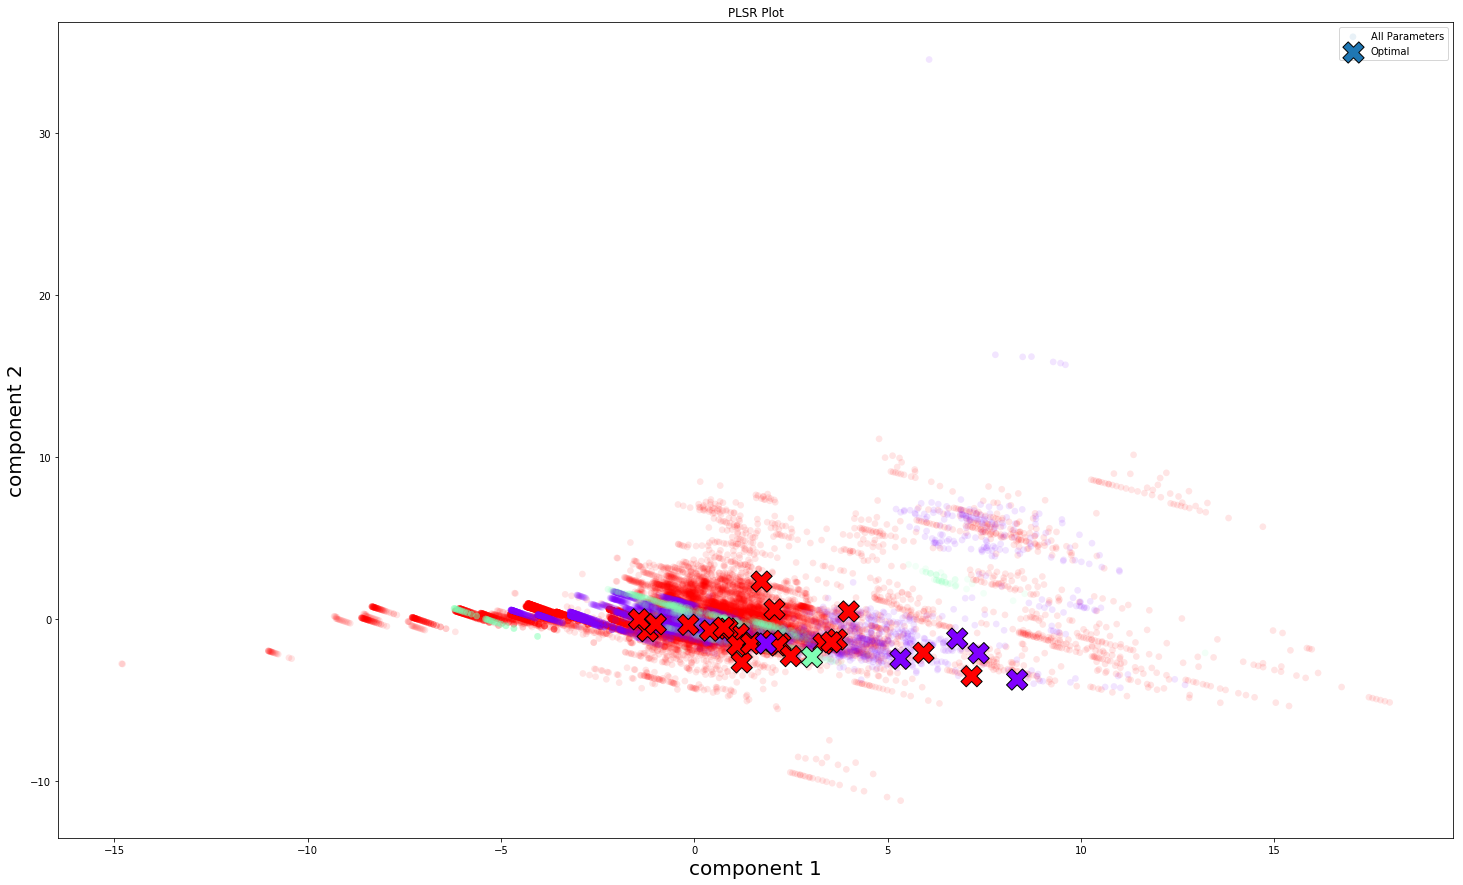

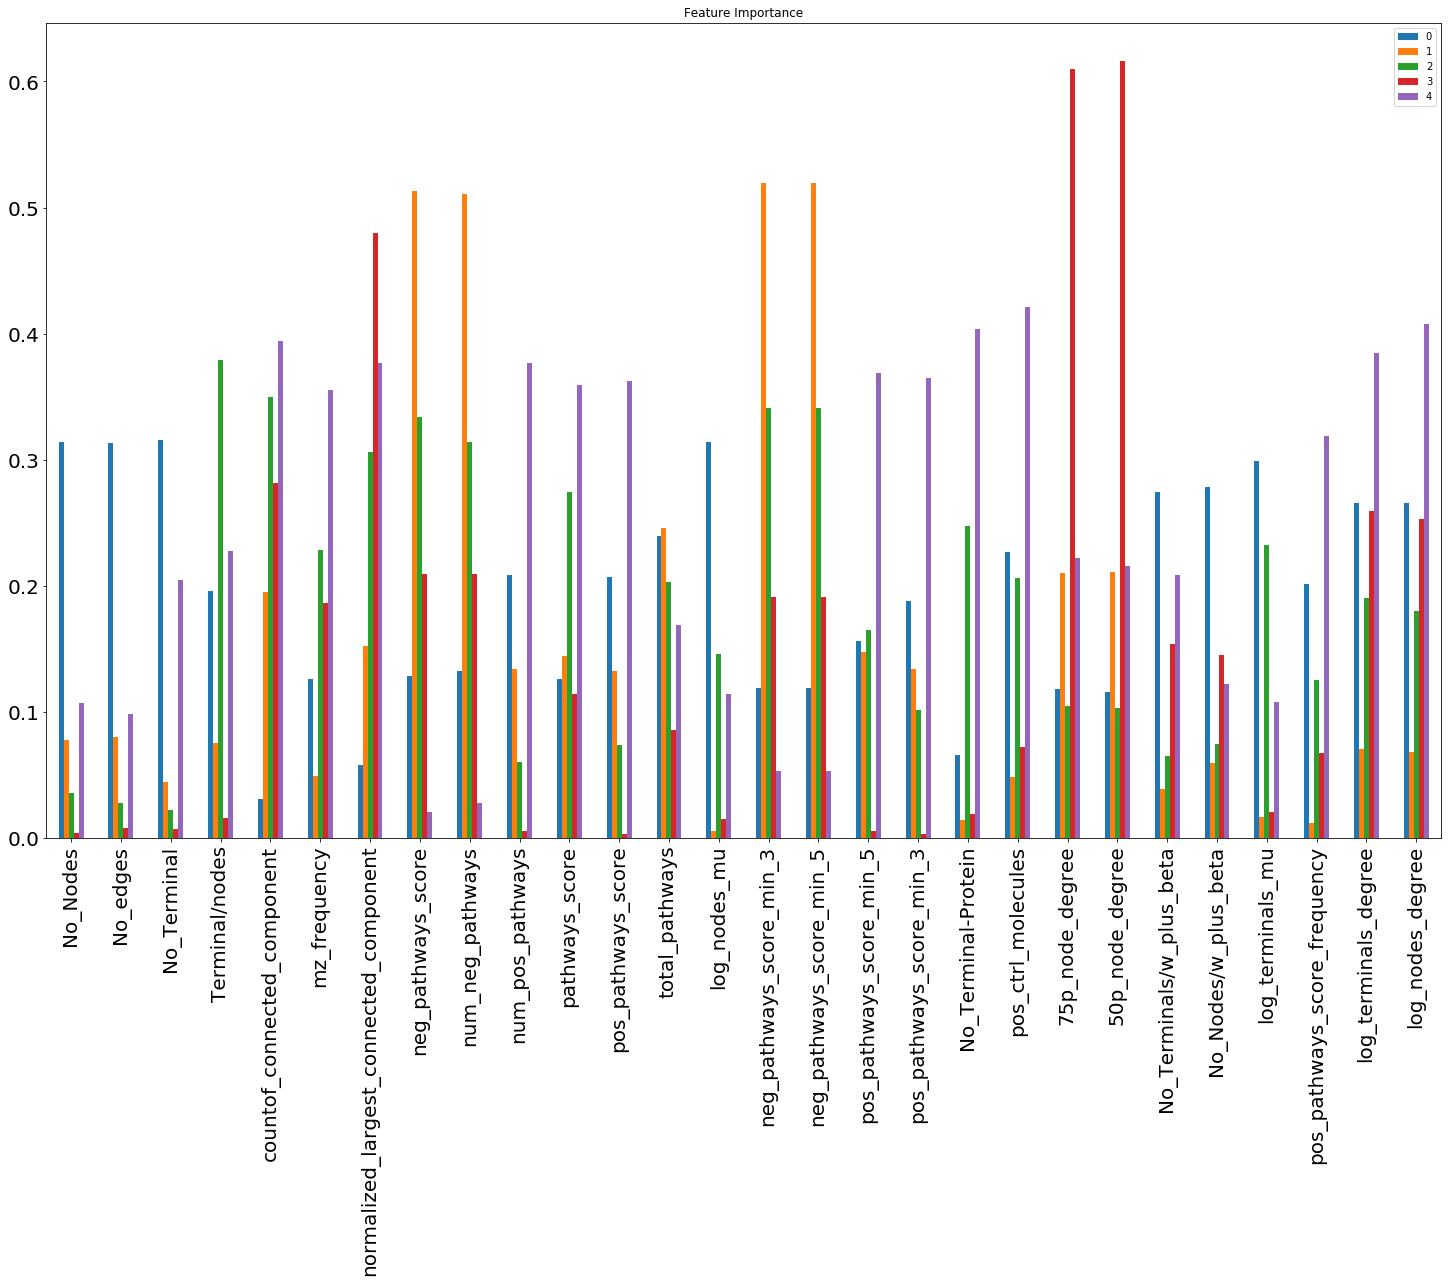

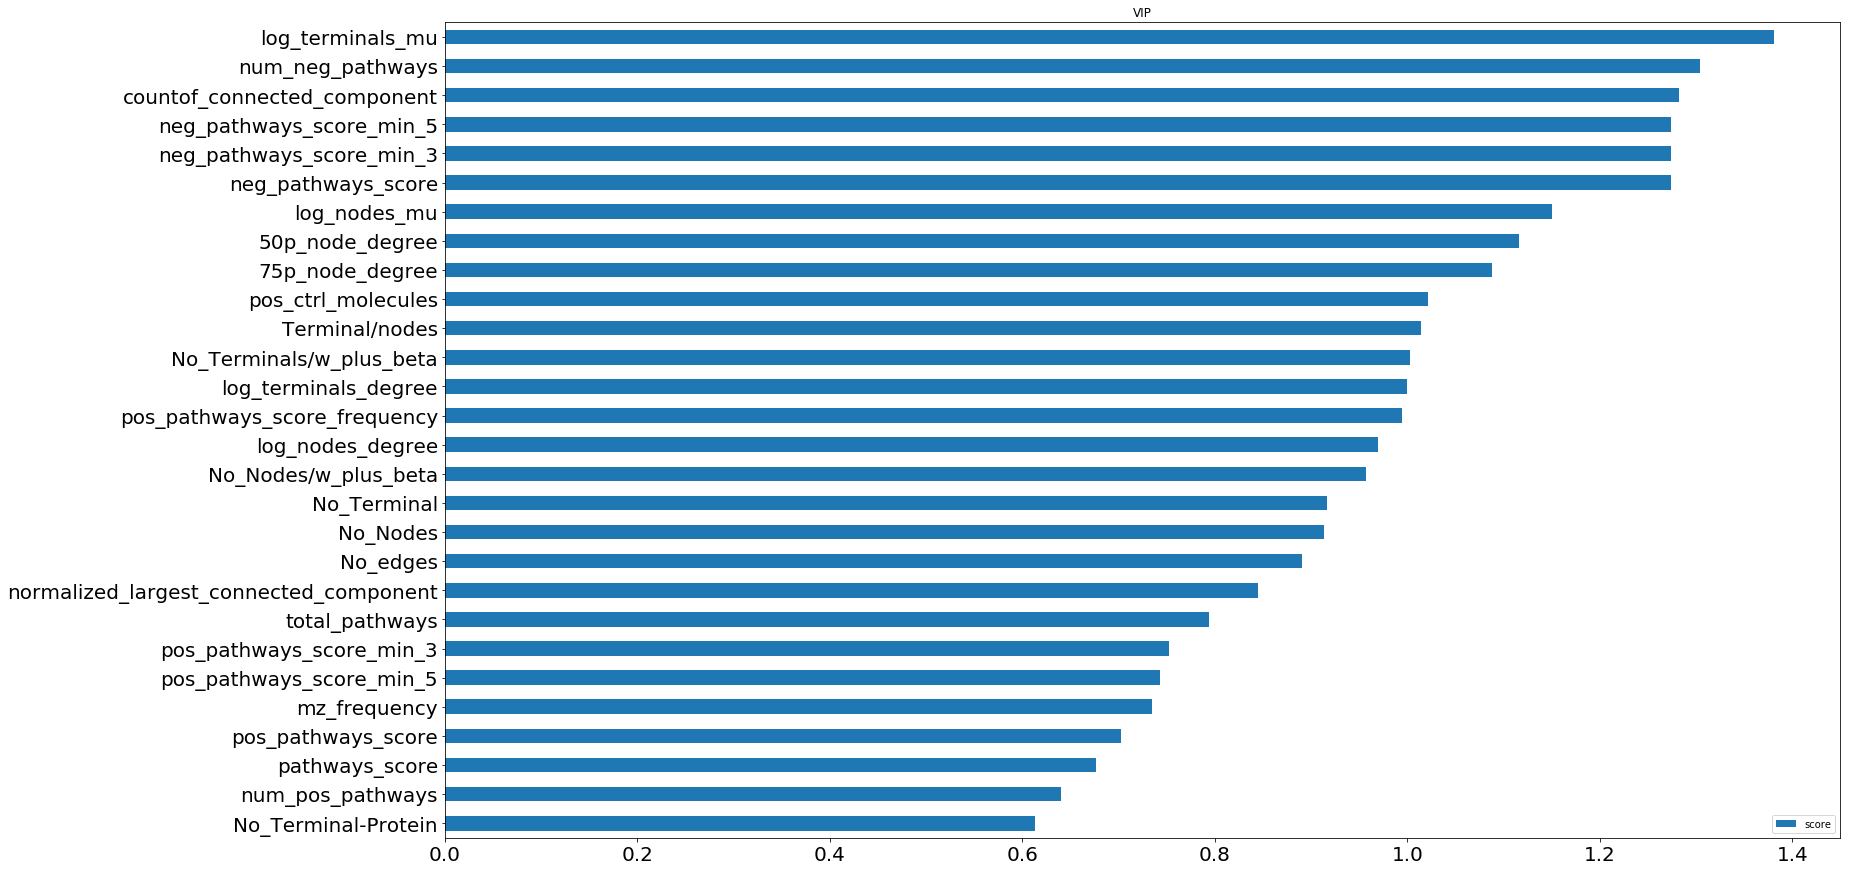

In [98]:
plot_df, vips, nmf_components = experiment_6(par_stat_preprocessed.copy(), col_set_2)

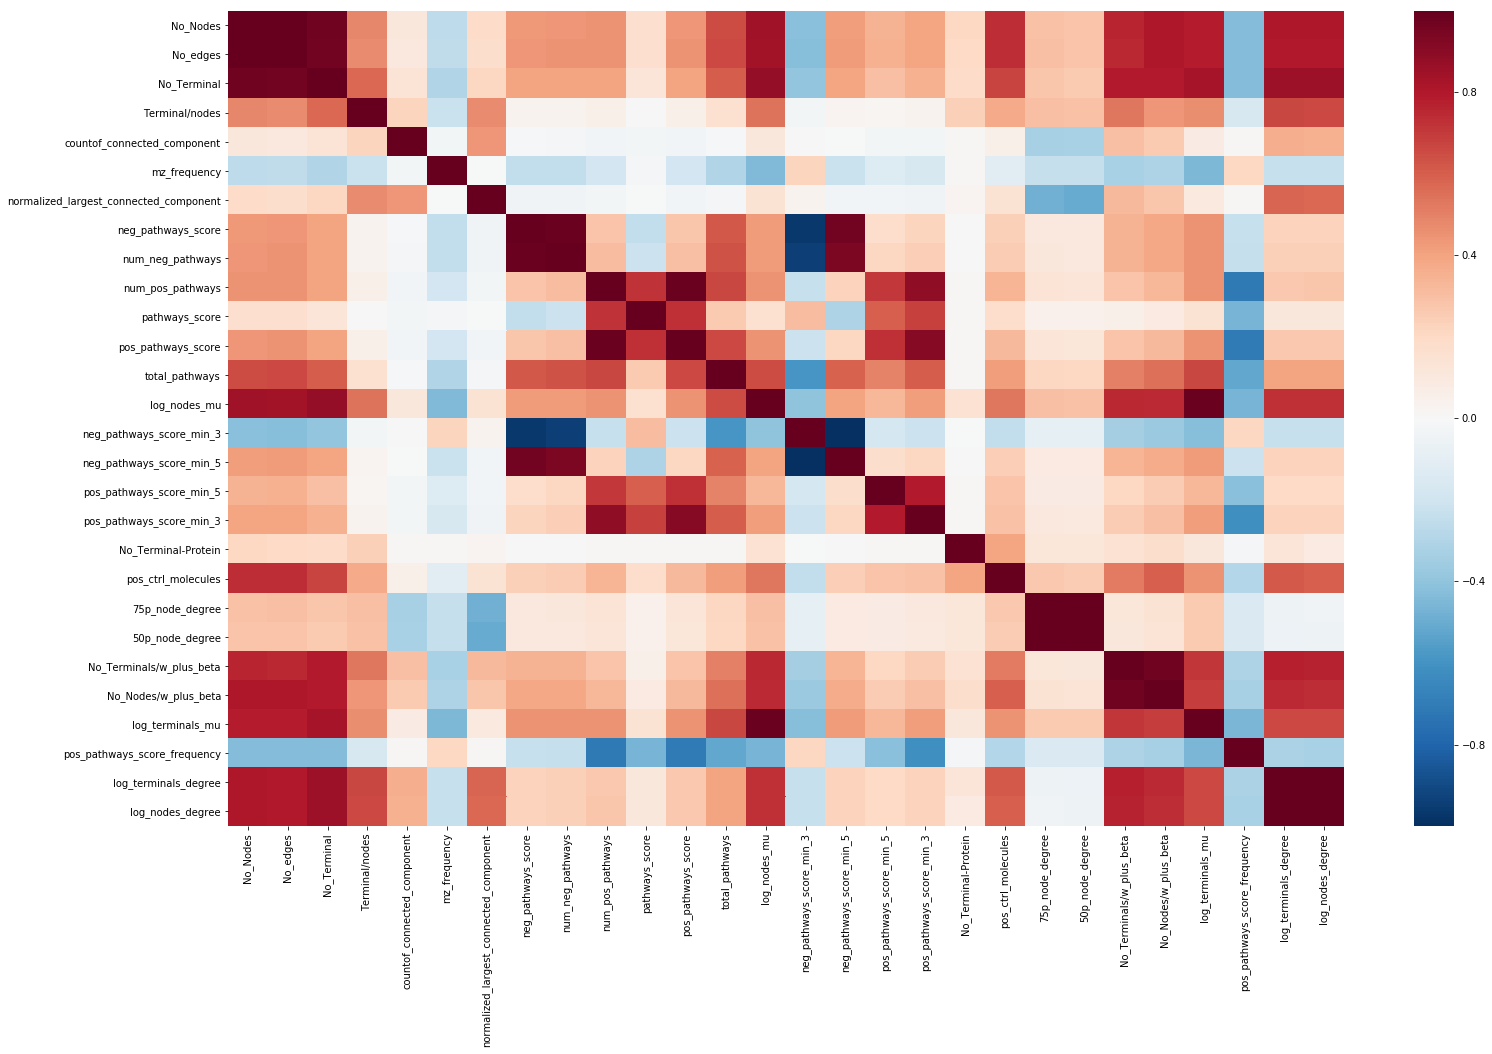

In [196]:
plt.figure(figsize=(25,15))
sns.heatmap(par_stat_preprocessed[col_set_2].corr(), cmap="RdBu_r")

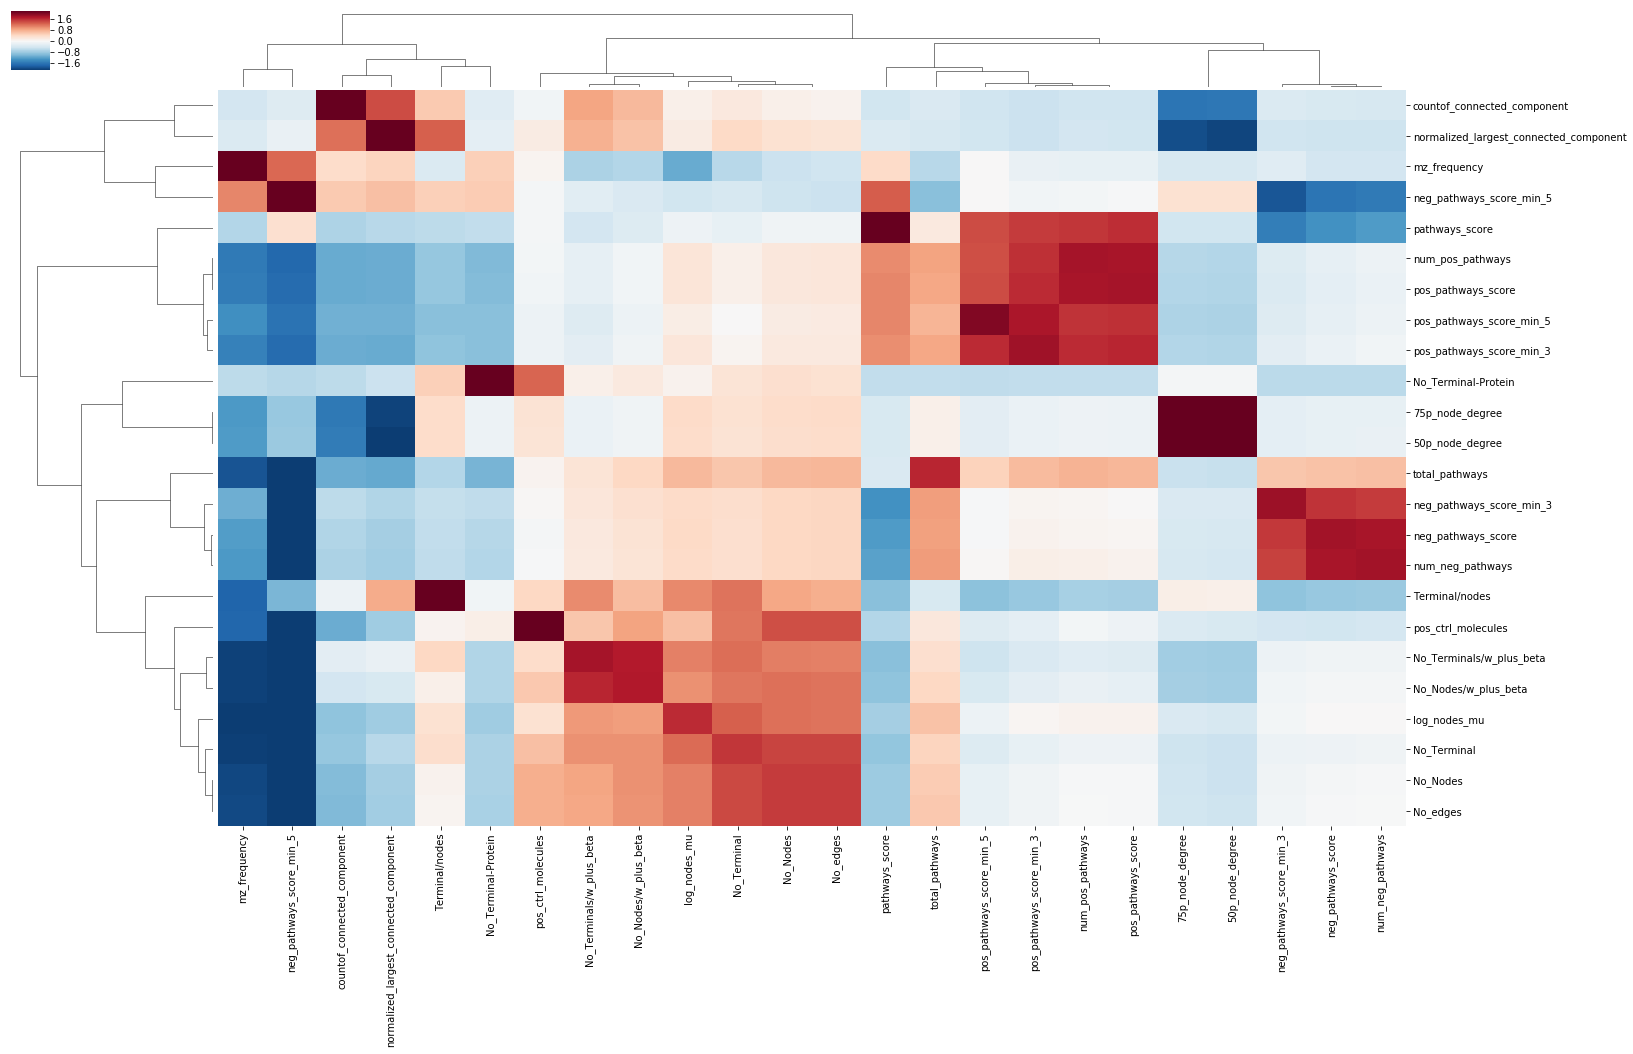

In [969]:
fig = sns.clustermap(par_stat_preprocessed[col_set_2][col_set_2].corr(), 
                            cmap="RdBu_r",
                            method="ward",
                            robust=True,
                            figsize=(25, 15),
                            center = 0,
                            z_score=0)

In [810]:
def experiment_7(plot_df, col_set):

    #fig, (ax1, ax2, ax3)   = plt.subplots(figsize=(35,60), nrows = 3)
    #plot_df = plot_df.loc[plot_df['project'] == '_tcell']

    plot_df['mu'] = np.log(plot_df['mu'])

    plt.figure(figsize=(25,15))
    

    print(plot_df['project'].unique())
    
    plot_df_opt = plot_df[plot_df['Optimal'] == True]

    #plot_df = plot_df.sort_values('mu').set_index('mu')

    #plt.xlim((min(plot_df['mu']) - (.60 * min(plot_df['mu']))), max(plot_df['mu']) + (.10 * max(plot_df['mu'])))

    plt.xlabel('Mu')
    plt.ylabel('No_Nodes')
    plt.scatter(x = list(plot_df['mu']), y = plot_df['No_Nodes'],
                c = plot_df['project'].astype("category").cat.codes,
                cmap = plt.cm.get_cmap('Set1', len(plot_df['project'].unique())),
                #cmap = 'seismic',
                #c = plot_df['pathways_score'],
                alpha = 0.1)
    plt.colorbar()
    
    
    plt.scatter(x = list(plot_df_opt['mu']), y = plot_df_opt['No_Nodes'], label = 'Optimal Parameters',
                edgecolor ='Blue', alpha=1, s = 555, marker = 'x', c = 'Blue',
                cmap = plt.cm.get_cmap('Set1', len(plot_df_opt['project'].unique())))
    
    group_by = 'project'
    
    for group_name in plot_df[group_by].unique():
        plt.text(plot_df.loc[plot_df[group_by] == group_name, 'mu'].mean(),
                   plot_df.loc[plot_df[group_by] == group_name, 'No_Nodes'].mean(),
                      group_name, fontsize = 20)

['_tcell' '_heart' '_kings_college']


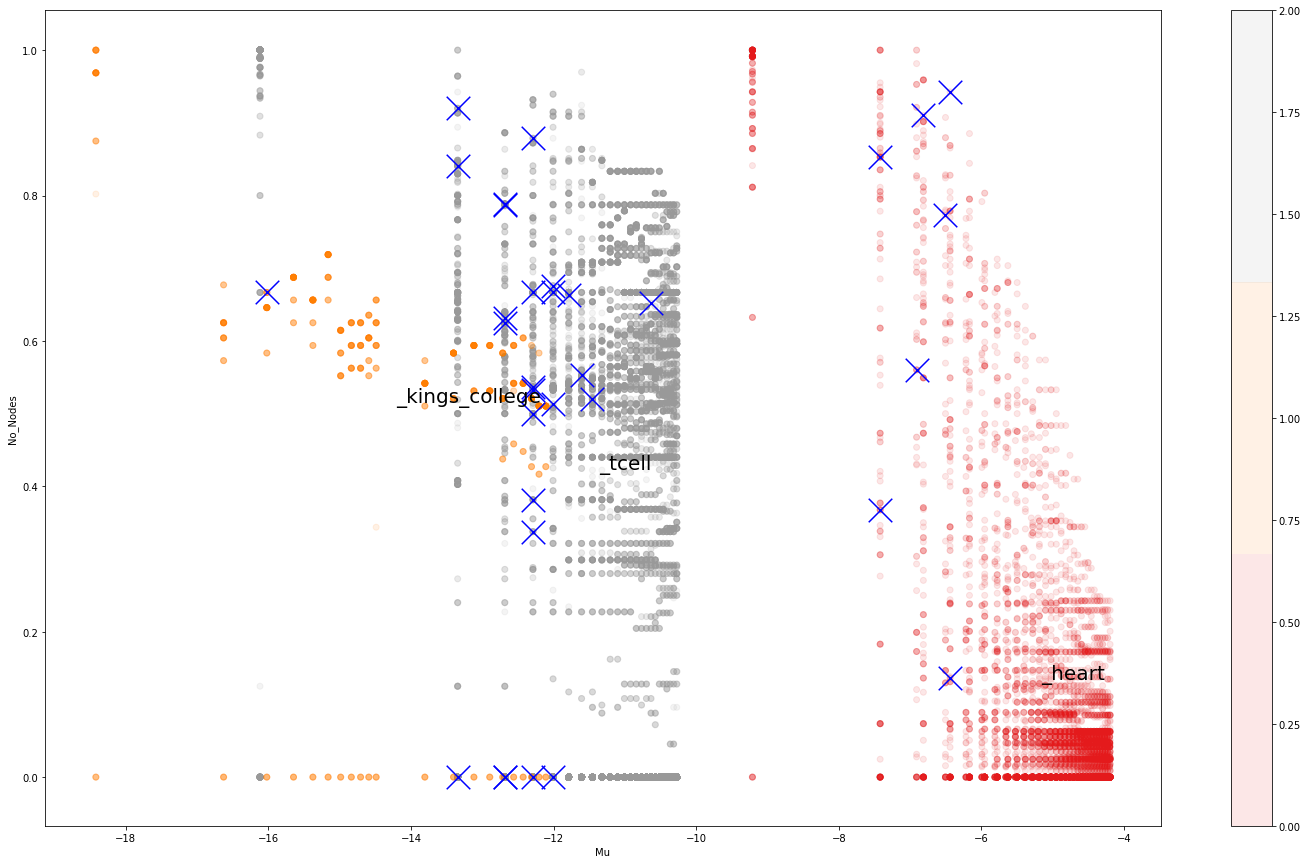

In [811]:
experiment_7(par_stat_preprocessed.copy(), col_set_1)

In [861]:
def experiment_8(plot_df, col_set):

    #fig, (ax1, ax2, ax3)   = plt.subplots(figsize=(35,60), nrows = 3)
    plot_df = plot_df.loc[plot_df['project'] == '_kings_college']

    plot_df['mu'] = np.log(plot_df['mu'])

    plt.figure(figsize=(25,15))
    

    print(plot_df['project'].unique())
    
    plot_df_opt = plot_df[plot_df['Optimal'] == True]

    #plot_df = plot_df.sort_values('mu').set_index('mu')

    #plt.xlim((min(plot_df['mu']) - (.60 * min(plot_df['mu']))), max(plot_df['mu']) + (.10 * max(plot_df['mu'])))

    plt.xlabel('Mu')
    plt.ylabel('log_nodes_mu')
    plt.scatter(x = list(plot_df['mu']), y = plot_df['log_nodes_mu'],
                #c = plot_df['project'].astype("category").cat.codes,
                #cmap = plt.cm.get_cmap('Set1', len(plot_df['project'].unique())),
                cmap = 'seismic',
                c = plot_df['pathways_score'],
                alpha = 0.1)
    
    plt.colorbar()
    
    plt.scatter(x = list(plot_df_opt['mu']), y = plot_df_opt['log_nodes_mu'], label = 'Optimal Parameters',
                edgecolor ='Blue', alpha=1, s = 555, marker = 'x', c = plot_df_opt['project'].astype("category").cat.codes,
                cmap = plt.cm.get_cmap('Set1', len(plot_df_opt['project'].unique())))
    
    group_by = 'project'
    
    for group_name in plot_df[group_by].unique():
        plt.text(plot_df.loc[plot_df[group_by] == group_name, 'mu'].mean(),
                   plot_df.loc[plot_df[group_by] == group_name, 'No_Nodes'].mean(),
                      group_name, fontsize = 20)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


['_kings_college']


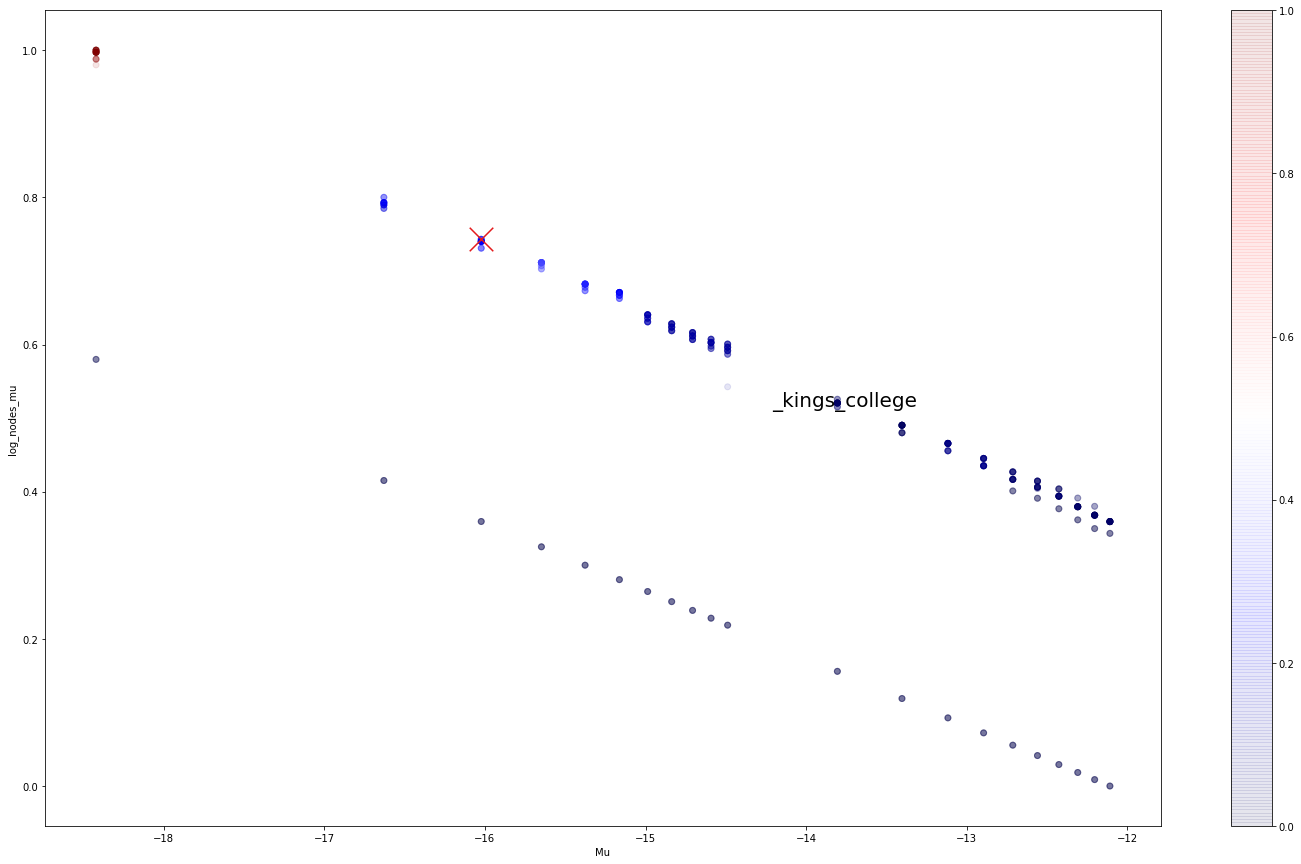

In [862]:
experiment_8(par_stat_preprocessed.copy(), col_set_1)

In [858]:
def experiment_9(plot_df, col_set):

    #fig, (ax1, ax2, ax3)   = plt.subplots(figsize=(35,60), nrows = 3)
    #plot_df = plot_df.loc[plot_df['project_name'] == '502_healthy_vs_mild_severe_met_lipid']
    #plt.cla()
    
    plot_df['mu'] = np.log(plot_df['mu'])

    plt.figure(figsize=(25,15))
    

    print(plot_df['project'].unique())
    
    plot_df_opt = plot_df[plot_df['Optimal'] == True]

    #plot_df = plot_df.sort_values('mu').set_index('mu')

    #plt.xlim((min(plot_df['mu']) - (.60 * min(plot_df['mu']))), max(plot_df['mu']) + (.10 * max(plot_df['mu'])))

    xaxis = 'num_pos_pathways'
    yaxis = 'log_nodes_mu'
    
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.scatter(x = list(plot_df[xaxis]), y = plot_df[yaxis],
                #c = plot_df['project'].astype("category").cat.codes,
                #cmap = plt.cm.get_cmap('Set1', len(plot_df['project'].unique())),
                cmap = 'seismic',
                c = plot_df['pathways_score'],
                alpha = 0.1)
    
    plt.colorbar()
    
    plt.scatter(x = list(plot_df_opt[xaxis]), y = plot_df_opt[yaxis], label = 'Optimal Parameters',
                edgecolor ='Blue', alpha=1, s = 555, marker = 'x', c = plot_df_opt['project'].astype("category").cat.codes,
                cmap = plt.cm.get_cmap('Set1', len(plot_df_opt['project'].unique())))
    
    group_by = 'project'
    
    for group_name in plot_df[group_by].unique():
        plt.text(plot_df.loc[plot_df[group_by] == group_name, xaxis].mean(),
                   plot_df.loc[plot_df[group_by] == group_name, yaxis].mean(),
                      group_name, fontsize = 20)
        
        
    
    plot_df = plot_df.sort_values(xaxis)
    x, y = plot_df[[xaxis]].values, plot_df[[yaxis]].values
    
    
    x = add_constant(x)
        
    regressor_OLS = sm.OLS(y, x).fit()
    reg_line     = lambda x: x * regressor_OLS.params[1] + regressor_OLS.params[0]
    conf_05_line = lambda x: x * regressor_OLS.conf_int(alpha = 0.05)[1][0] + regressor_OLS.conf_int(alpha = 0.05)[0][0]
    conf_95_line = lambda x: x * regressor_OLS.conf_int(alpha = 0.05)[1][1] + regressor_OLS.conf_int(alpha = 0.05)[0][1]

    print(x)
    
    x        = [i[1] for i in x]
    y        = [i[0] for i in y]
    
    
    print('Conf interval:')
    print(regressor_OLS.conf_int(alpha = 0.025))
    
    x_conf_05 = [i for i in np.linspace(0, int(max(x)), len(x))]
    y_conf_05 = [conf_05_line(i) for i in np.linspace(0, int(max(x)), len(x))]
    
    x_conf_95 = [i for i in np.linspace(0, int(max(x)), len(x))]
    y_conf_95 = [conf_95_line(i) for i in np.linspace(0, int(max(x)), len(x))]
    
    ols_line_x = [i for i in np.linspace(0, int(max(x)), len(x))]
    ols_line_y = [reg_line(i) for i in np.linspace(0, int(max(x)), len(x))]
    
    
    plt.plot(ols_line_x, ols_line_y)
    #plt.plot(x_conf_95, y_conf_95)
    #plt.plot(x_conf_05, y_conf_05)
    
    return regressor_OLS

['_tcell' '_heart' '_kings_college']
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Conf interval:
[[0.30598712 0.31287219]
 [0.31599393 0.340455  ]]


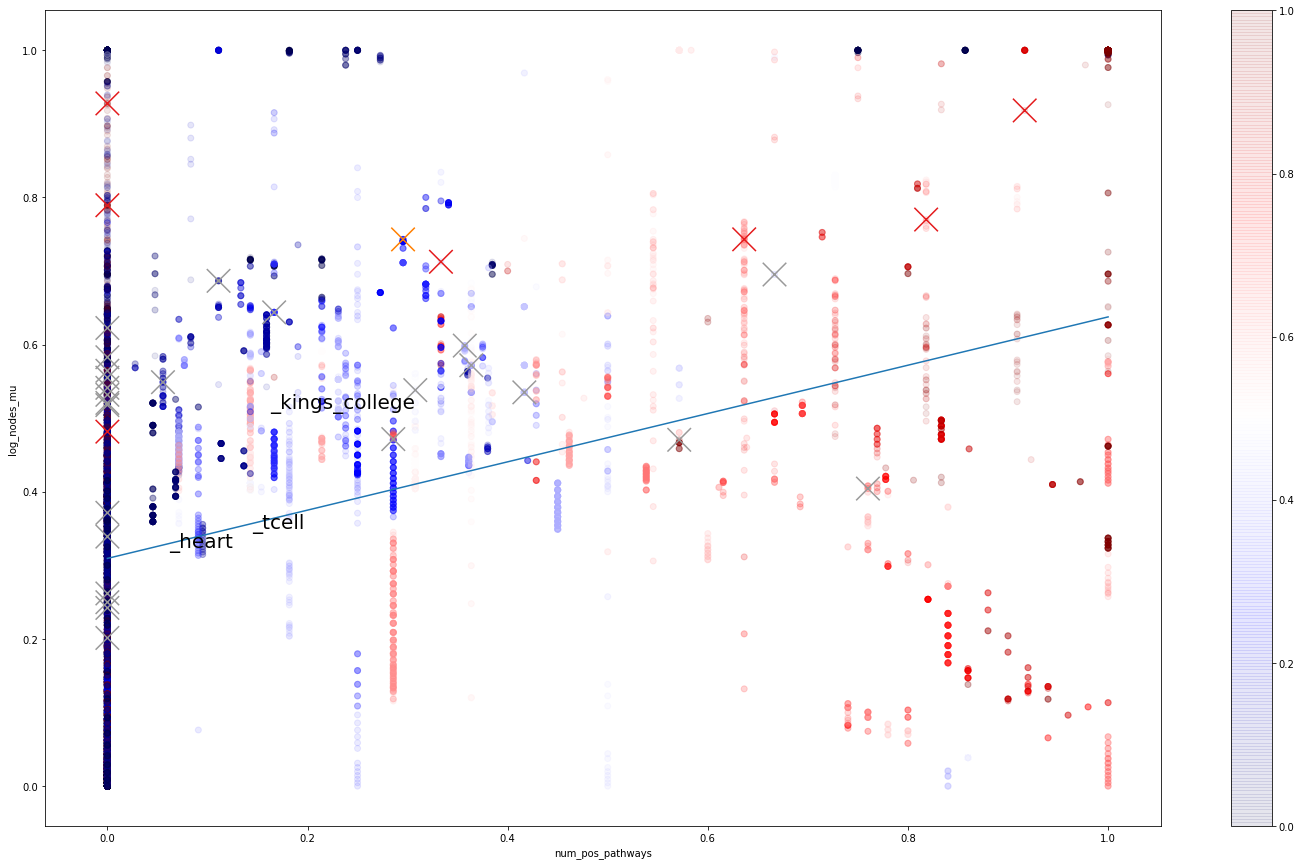

In [859]:
ols = experiment_9(par_stat_preprocessed.copy(), col_set_1)

In [972]:
ols.pvalues

array([0., 0.])

In [84]:
def experiment_12(plot_df, col_set):
    
    clf = tree.DecisionTreeClassifier()
    #clf = clf.fit(plot_df[[col_set]], plot)
    tree.plot_tree(clf.fit(plot_df[[col_set]], plot_df[['Optimal']])) 

In [85]:
experiment_12(par_stat_preprocessed, col_set_2)

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'